# Loan Tap
- LoanTap is an online platform committed to delivering customized loan products to millennials
- LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan

# Objective of the case study
- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?
- This case study will focus only on the underwriting process behind Personal Loan only

# Approach
- Basic Data Analysis
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Data Preprocessing
- Statistical Tests
    - Chisquare, Anova Test
- Modeling
- Assumptions of Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
bold_start = '\033[1m'
bold_end = '\033[0m' 

In [2]:
#Load Dataset
path = r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\LoanTap\Dataset"
#path = r"E:\Nextstep\Scaler\Business-Case-Study\LoanTap\Dataset"
raw_df = pd.read_csv(path + "\logistic_regression.csv")
pd.options.display.max_columns = raw_df.shape[1]
raw_df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

# Data Analysis

In [3]:
#Statistics of Dataset
pd.options.display.max_columns = raw_df.shape[1]
raw_df.describe(include='all')

loan_amnt        term       int_rate    installment   grade  \
count   396030.000000      396030  396030.000000  396030.000000  396030   
unique            NaN           2            NaN            NaN       7   
top               NaN   36 months            NaN            NaN       B   
freq              NaN      302005            NaN            NaN  116018   
mean     14113.888089         NaN      13.639400     431.849698     NaN   
std       8357.441341         NaN       4.472157     250.727790     NaN   
min        500.000000         NaN       5.320000      16.080000     NaN   
25%       8000.000000         NaN      10.490000     250.330000     NaN   
50%      12000.000000         NaN      13.330000     375.430000     NaN   
75%      20000.000000         NaN      16.490000     567.300000     NaN   
max      40000.000000         NaN      30.990000    1533.810000     NaN   

       sub_grade emp_title emp_length home_ownership    annual_inc  \
count     396030    373103     377729         396030  3.960300e+05   
unique        35    173105         11              6           NaN   
top           B3   Teacher  10+ years       MORTGAGE           NaN   
freq       26655      4389     126041         198348           NaN   
mean         NaN       NaN        NaN            NaN  7.420318e+04   
std          NaN       NaN        NaN            NaN  6.163762e+04   
min          NaN       NaN        NaN            NaN  0.000000e+00   
25%          NaN       NaN        NaN            NaN  4.500000e+04   
50%          NaN       NaN        NaN            NaN  6.400000e+04   
75%          NaN       NaN        NaN            NaN  9.000000e+04   
max          NaN       NaN        NaN            NaN  8.706582e+06   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   
mean                   NaN       NaN         NaN                 NaN   
std                    NaN       NaN         NaN                 NaN   
min                    NaN       NaN         NaN                 NaN   
25%                    NaN       NaN         NaN                 NaN   
50%                    NaN       NaN         NaN                 NaN   
75%                    NaN       NaN         NaN                 NaN   
max                    NaN       NaN         NaN                 NaN   

                     title            dti earliest_cr_line       open_acc  \
count               394275  396030.000000           396030  396030.000000   
unique               48817            NaN              684            NaN   
top     Debt consolidation            NaN         Oct-2000            NaN   
freq                152472            NaN             3017            NaN   
mean                   NaN      17.379514              NaN      11.311153   
std                    NaN      18.019092              NaN       5.137649   
min                    NaN       0.000000              NaN       0.000000   
25%                    NaN      11.280000              NaN       8.000000   
50%                    NaN      16.910000              NaN      10.000000   
75%                    NaN      22.980000              NaN      14.000000   
max                    NaN    9999.000000              NaN      90.000000   

              pub_rec     revol_bal     revol_util      total_acc  \
count   396030.000000  3.960300e+05  395754.000000  396030.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean         0.178191  1.584454e+04      53.791749      25.414744   
std          0.530671  2.059184e+04      24.452193      11.886991 

### Inference:
- Categorical Features
	- **term:** 36 months is the preferred tenure 
	- **grade:** Grade B is given for the majority of the customers, yet to check the ordinality of the feature
	- **sub_grade:** Subgrade B3 (Might be the subgrade of grade B) is given for the majority of the customers
	- **emp_title:** 
        - High number of unique values observed
        - Professional Teachers are looking for the loan
	- **emp_length:** 10+ years experienced professional are looking for the loan
	- **home_ownership:** Mortgaged home owners are majorly looking for the loan, as their income is already locked for EMI
	- **verification_status:** Majority of the income status of the customers are verified
	- **issue_d** (Date time)
	- **loan_status:**
        - It is the binary Target variable
        - Fully paid (Trustable Customer), Charged Off (Defaulter)
	- **purpose:** 
        - Majority of the borrowers are expecting loan to close another debt indicating the borrowers already have a debt
	- **title:**
        - High number of unique values observed
        - Majority of the borrowers are expecting loan to close another debt
	- **earliest_cr_line:**
        - Date Feature
        - Feature transformation is required before modeling
	- **initial_list_status:** Binary variable
	- **application_type:** Majority of the borrowers are individual
- Numerical Features
	- **loan_amnt:**
        - Average loan amount in the dataset is ~14000 and 500 being the lowest loan amount 
	- **int_rate:**
        - The interest rate ranges from ~5% to ~31% and the average being ~13%
	- **installment:**
        - Average installment amount is ~400 and ~16 being the lowest loan amount 
	- **annual_inc:**
        - Average annual increment mentioned by borrowers are in the range of 0 to 8.7million 
	- **dti:**
        - Difference between Q3 and max indicates the highly right skewed data
	- **open_acc:**
        - Average Open credit lines of the borrowers is ~11 
        - The Difference between Q3 and max indicates the highly right skewed data
    - **pub_rec:**
        - The Difference between Q3 and max indicates the highly right skewed data
	- **revol_bal:**
        - Average revolving balance is ~15000 while applying for the loan
	- **revol_util:**
	- **total_acc:**
        - Average number of credit lines is ~25 while applying for the loan
	- **mort_acc:**
        - Average number of mortgage accounts is ~2 while applying for the loan
        - The Difference between Q3 and max indicates the highly right skewed data
	- **pub_rec_bankruptcies:**
        - The Difference between Q3 and max indicates the highly right skewed data

In [4]:
#Characteristics of Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
raw_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
ser = (raw_df.isnull().sum() * 100)/len(raw_df)
print(bold_start + "% of Missing data is as follows," + bold_end)
ser[ser>0].sort_values(ascending=False)

% of Missing data is as follows,


mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

### Inference:
- **Null Values** in the dataset are identified for features **mort_acc, emp_title, emp_length, title, pub_rec_bankruptcies and revol_util**
- Data is required to be cleaned

## Unique value Analysis

In [7]:
raw_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [8]:
raw_df['open_acc'].unique(), raw_df['pub_rec'].unique()
raw_df['mort_acc'].unique(), raw_df['pub_rec_bankruptcies'].unique()

(array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
         9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
        21., 20., 31., 28., 30., 23., 26., 27.]),
 array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.]))

#### Inference:
- Features such as open_acc, pub_rec, mort_acc, pub_rec_bankruptcies are defined as numerical but should be changed to categorical as they are discrete values not continous

## Data Restructuring

In [9]:
# Convert to DateTime Object
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])

In [10]:
# Extract PINCODE from Address
pat = r'(\d+)$'
raw_df['pincode'] = raw_df['address'].str.extract(pat, flags=0, expand=True)
raw_df['pincode'].unique()
raw_df.drop('address', axis=1, inplace=True)

In [11]:
# Transform features to object
cust_features = ['open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
for feature in cust_features:
    raw_df[feature] = raw_df[feature].astype('object')

### Inference:
- Converted issue_d and earliest_cr_line to datetime objects to facilitate analysis by month and year.
- Extracted the pincode from the complete textual address, simplifying analysis and providing more actionable insights.
- Notably, loans were applied from only 10 unique pincodes, suggesting that borrowers are concentrated in a small number of cities. This indicates that the "Loantap" business is not yet widely recognized.
- Dropped Address column from further analysis
- Transform 'open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies' features from numerical to categorical

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

In [12]:
cat_features = list(raw_df.describe(include='object').columns)
num_features = list(raw_df.describe().columns)
date_features = list(raw_df.describe(include='datetime64[ns]', datetime_is_numeric=True).columns)
print(bold_start + 'Categorical Features:' + bold_end, cat_features)
print(bold_start + 'Numerical Features:' + bold_end, num_features)
print(bold_start + 'Date Time Features:' + bold_end, date_features)

Categorical Features: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'open_acc', 'pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'pincode']
Numerical Features: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']
Date Time Features: ['issue_d', 'earliest_cr_line']


## Univariate Analysis

In [13]:
def univariate_plot_cat(df, feature):
    plt.figure(figsize=(12,4))   
    if df[feature].nunique() < 20:
        # Categorical Feature with categories < 20
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        plt.subplot(1,2,1)
        sns.countplot(data=df, x=feature) 
        plt.xticks(rotation = 90)
        plt.subplot(1,2,2)
        labels = df[feature].value_counts().index
        plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
        plt.show()
    elif df[feature].nunique() < 100:
        # Categorical Feature with categories > 20 and < 100
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        sns.countplot(data=df, x=feature) 
        plt.xticks(rotation = 90)
    else:
        # Categorical Feature with categories > 20
        plt.suptitle('Univariate Analysis of ' + feature + ": Top5 and Bottom-5 categories Plot")
        plt.subplot(1,2,1)
        top5 = df[feature].value_counts()[:5]
        sns.barplot(x= list(top5.index), y=top5)
        plt.xticks(rotation = 90)
        plt.subplot(1,2,2)
        bot5 = df[feature].value_counts()[-5:]
        sns.barplot(x= list(bot5.index), y=bot5)
        plt.xlabel(feature)
        plt.xticks(rotation = 90)

In [14]:
def univariate_plot_num(df, feature):
    plt.figure(figsize=(12,4))   
    # Numerical Feature
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    outlier, iqr_th = outlier_detection(raw_df, feature)
    if outlier > 0:
        plt.figure(figsize=(12,4))  
        data = df[df[feature] < iqr_th][feature]
        plt.suptitle(feature + " without outliers")
        plt.subplot(1,2,1)
        sns.histplot(data, kde=True, bins=20)
        plt.subplot(1,2,2)
        sns.boxplot(data)
        plt.xlabel(feature)

In [15]:
def univariate_plot_date(df, feature):
    plt.figure(figsize=(12,4))   
    # Date Time Feature
    plt.suptitle('Univariate Analysis of ' + feature + ": Year and Monthwise Plot")
    plt.subplot(1,2,1)
    yr = raw_df[feature].dt.year
    sns.countplot(x=yr)
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    mon = raw_df[feature].dt.month_name()
    sns.countplot(x=mon)
    plt.xticks(rotation = 90)

In [16]:
# No outliers are detected on the leftside
def outlier_detection(raw_df, feature):
    q1 = np.percentile(raw_df[feature].dropna(), 25)
    q3 = np.percentile(raw_df[feature].dropna(), 75)
    iqr = q3 - q1
    outlier = len(raw_df[raw_df[feature]> (q3 + 1.5*iqr)])
    return outlier, q3 + 1.5*iqr

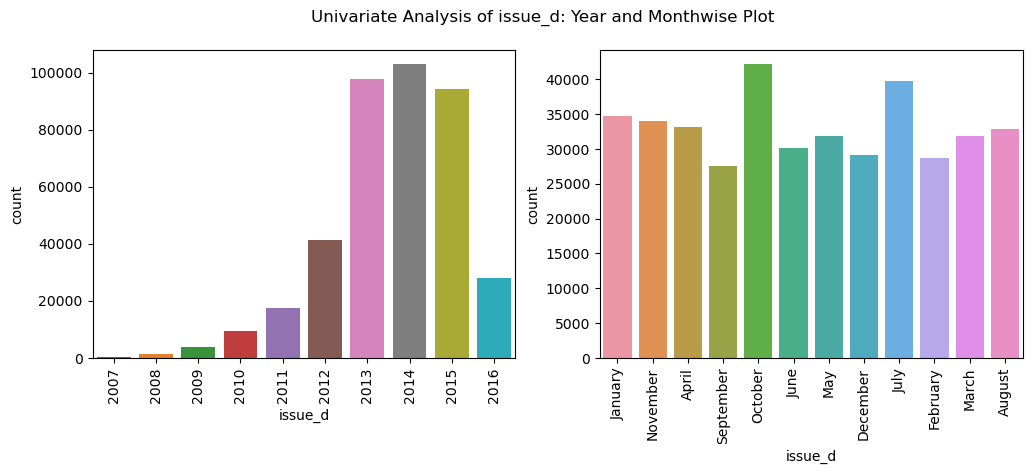

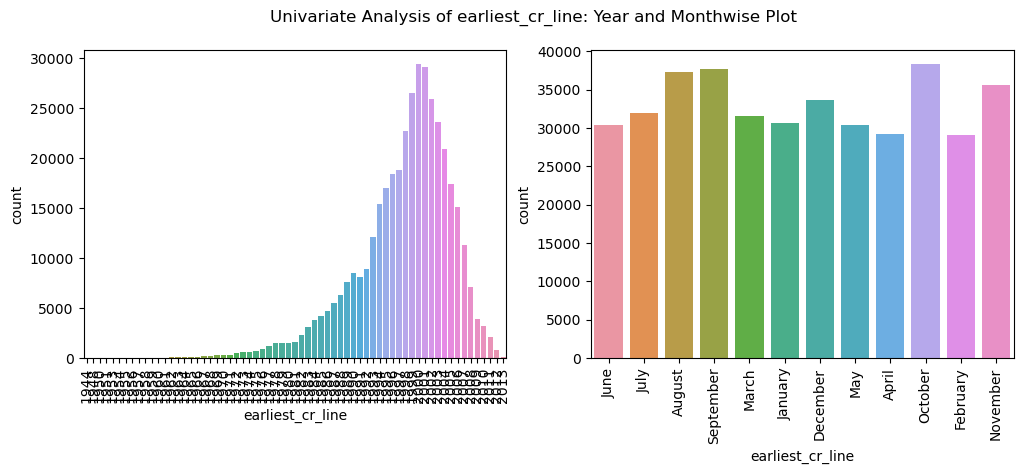

In [17]:
for feature in date_features:
    univariate_plot_date(raw_df, feature)

#### Inference:
- The majority of loans were issued between 2013 and 2015, with October and July emerging as the top two months for loan approvals
- The distribution of the earliest credit line is left-skewed and centered around the year 2000, indicating that most borrowers began their credit journey during this period

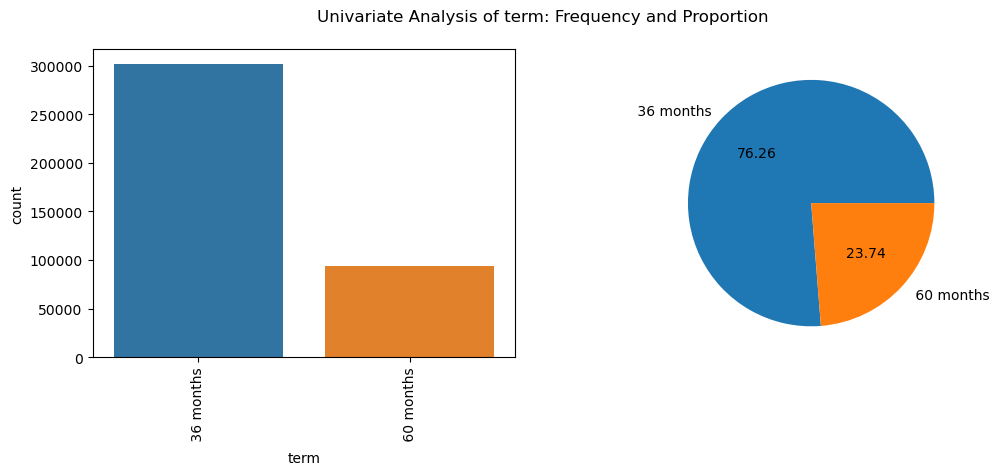

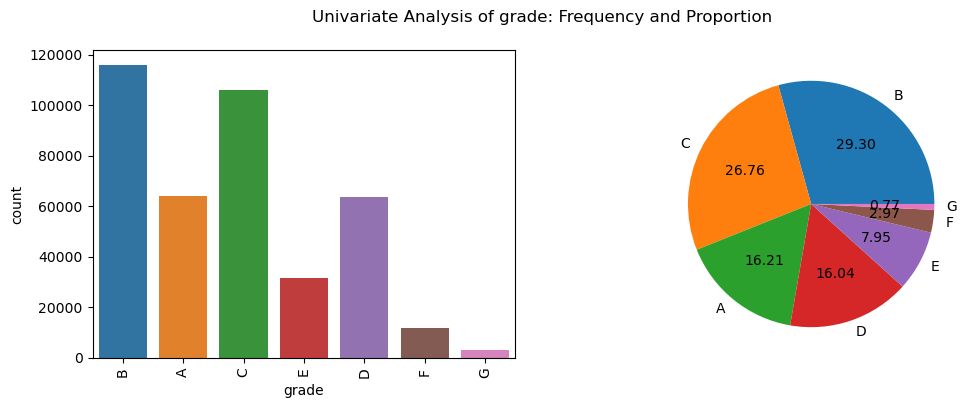

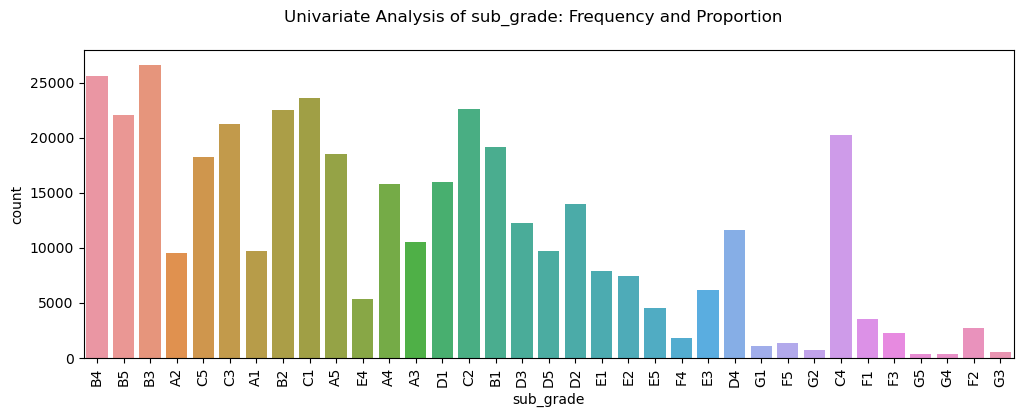

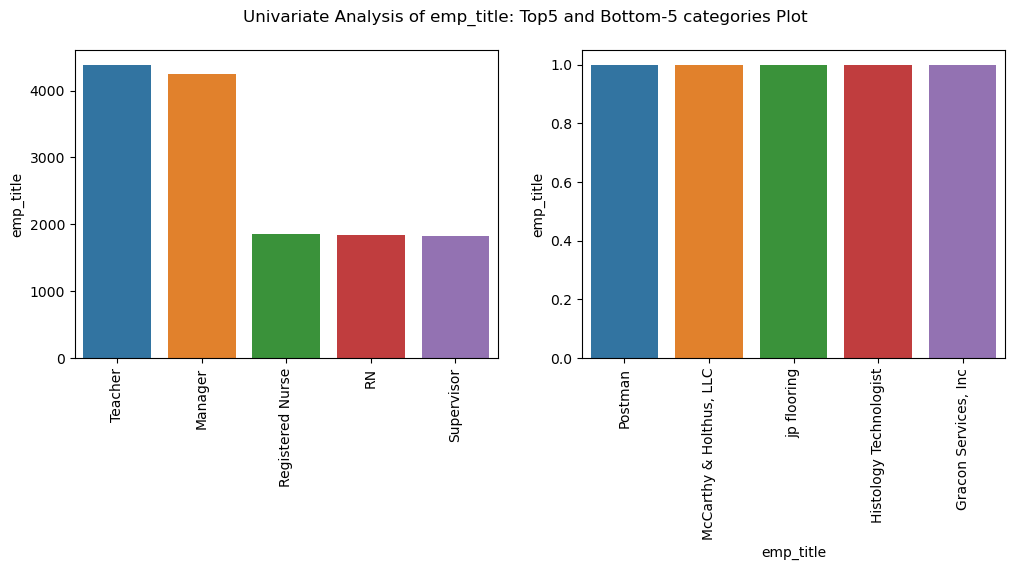

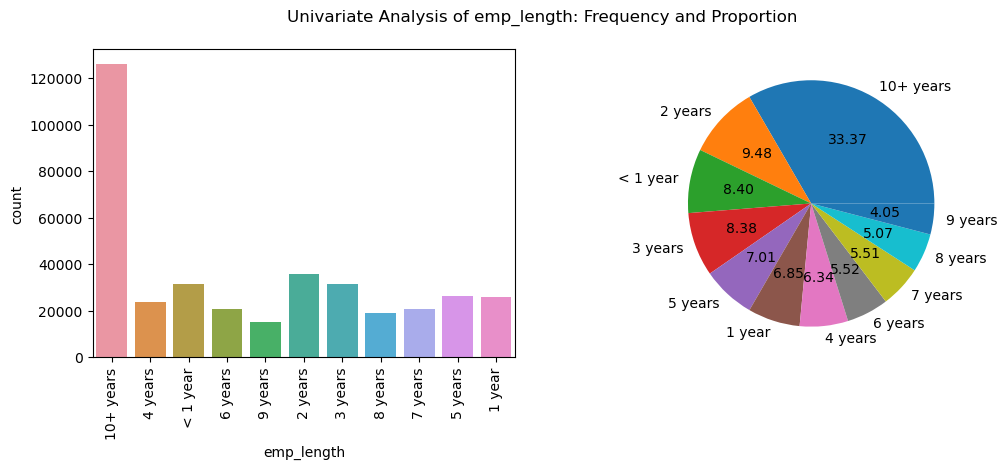

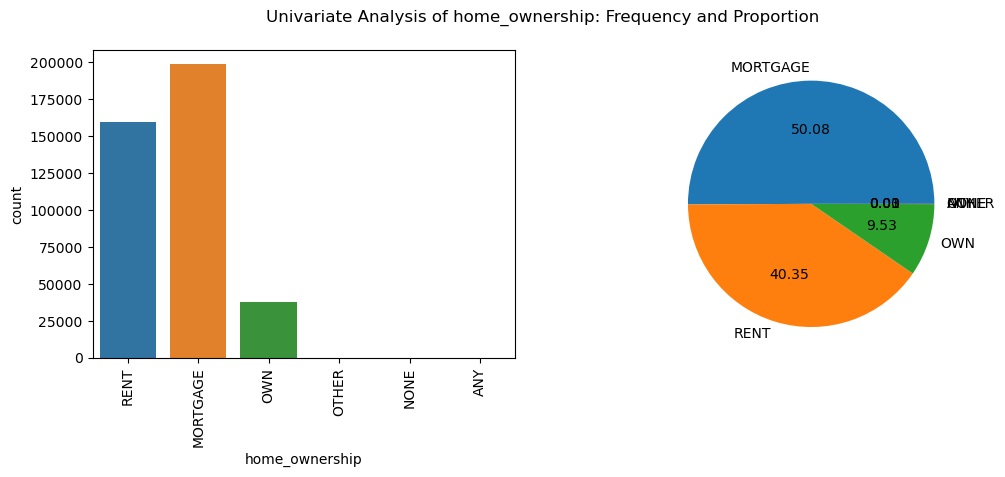

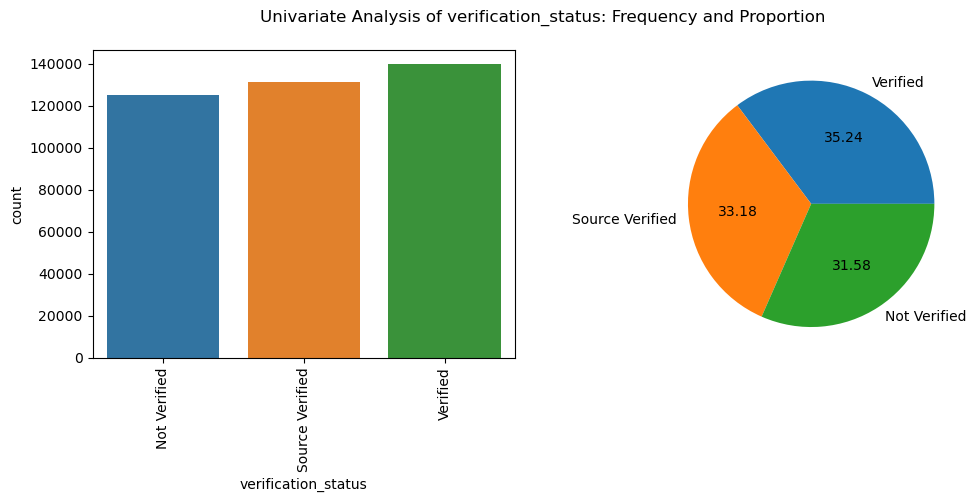

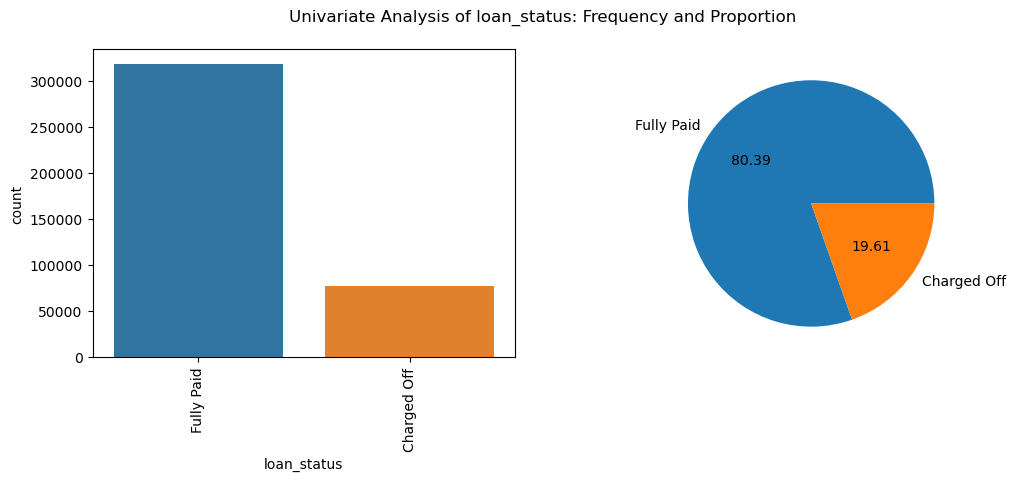

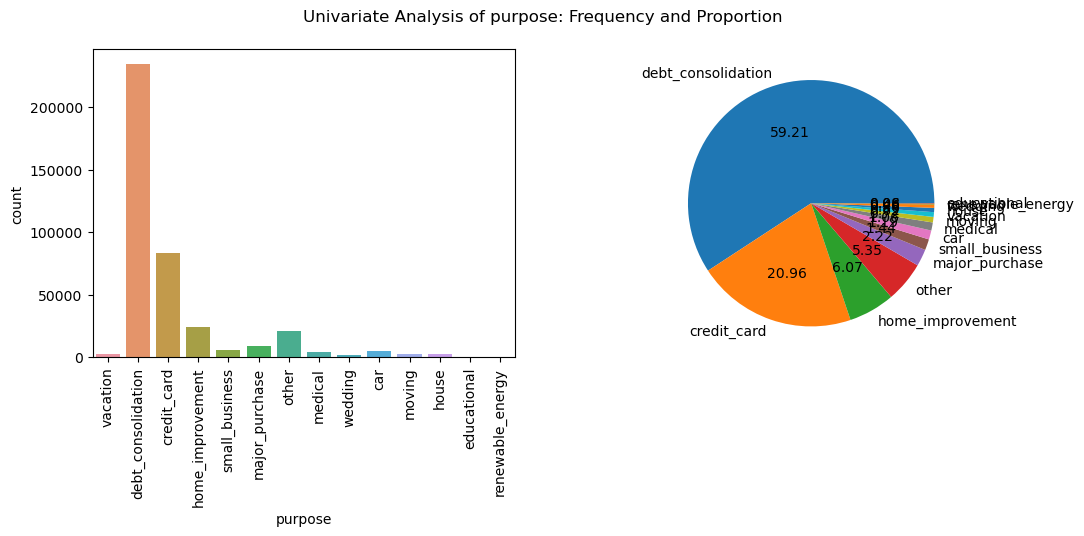

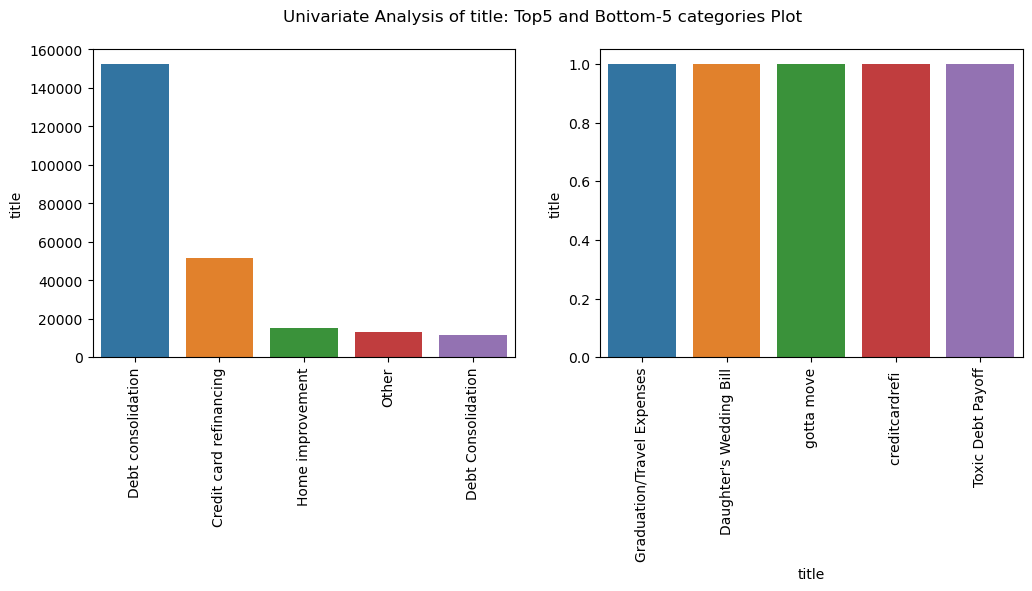

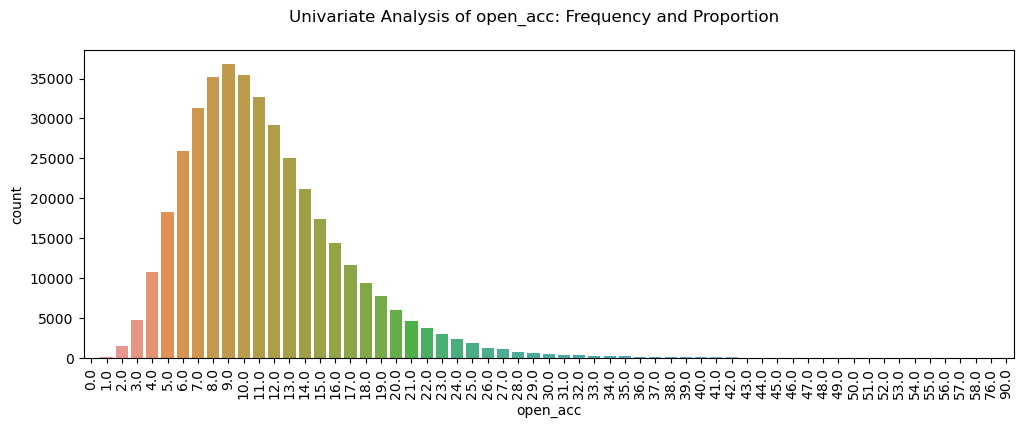

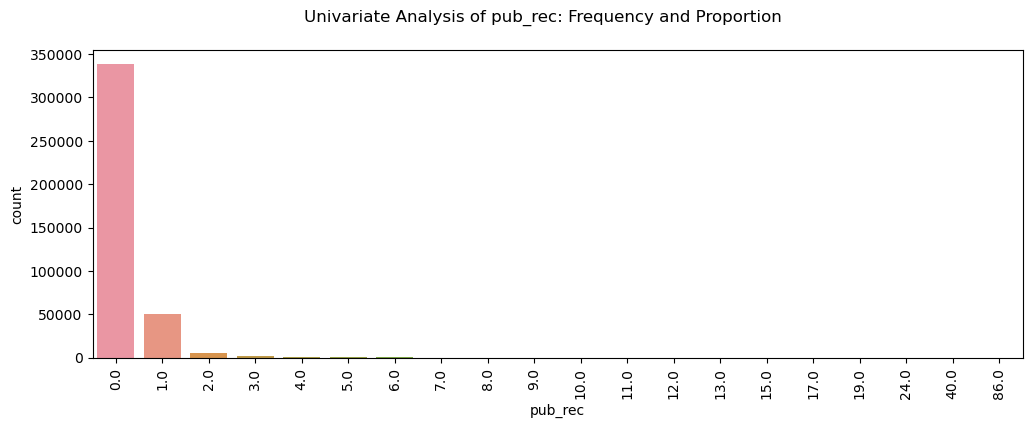

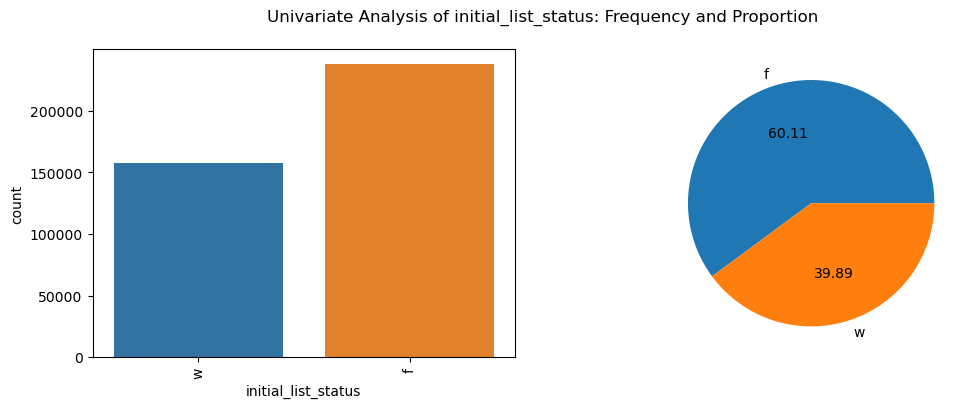

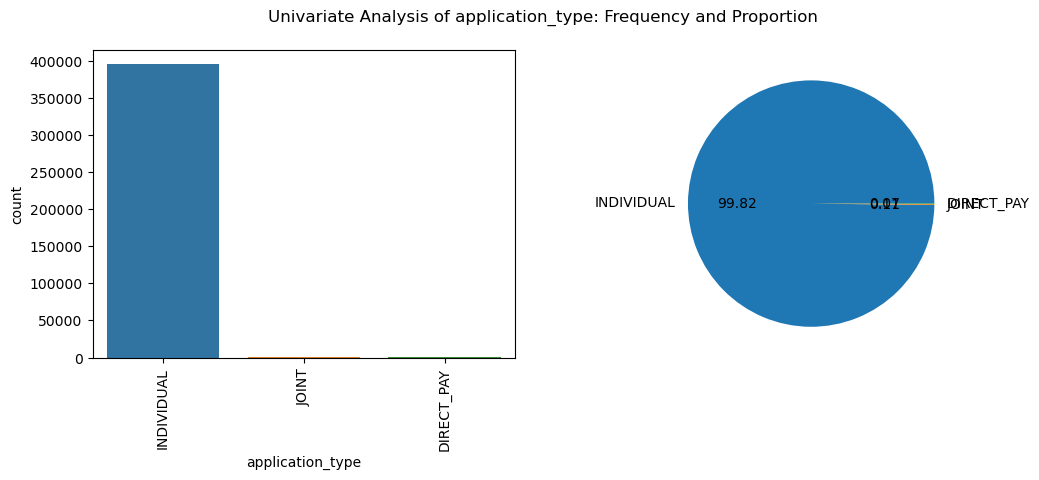

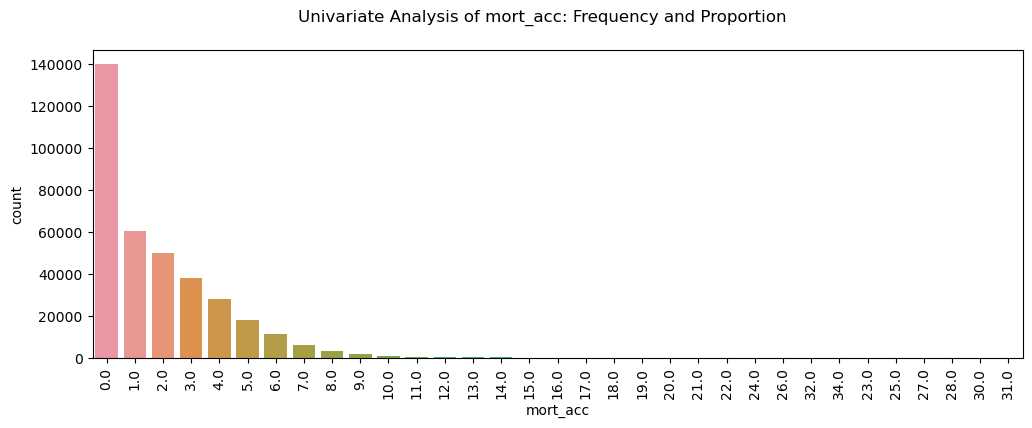

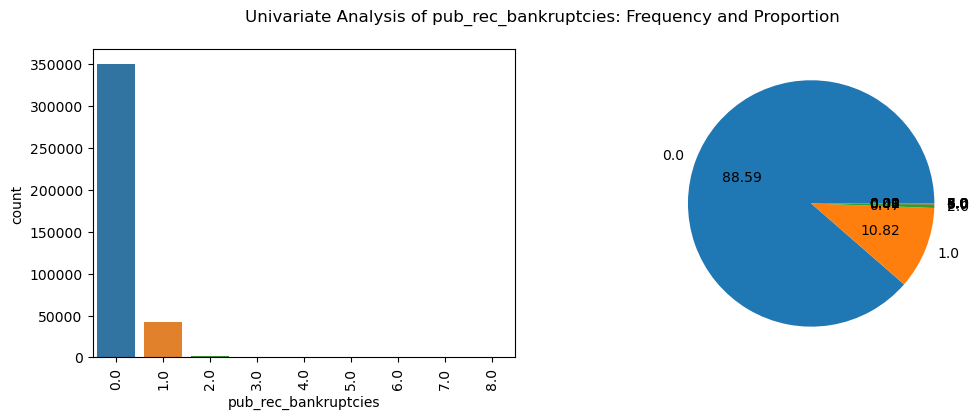

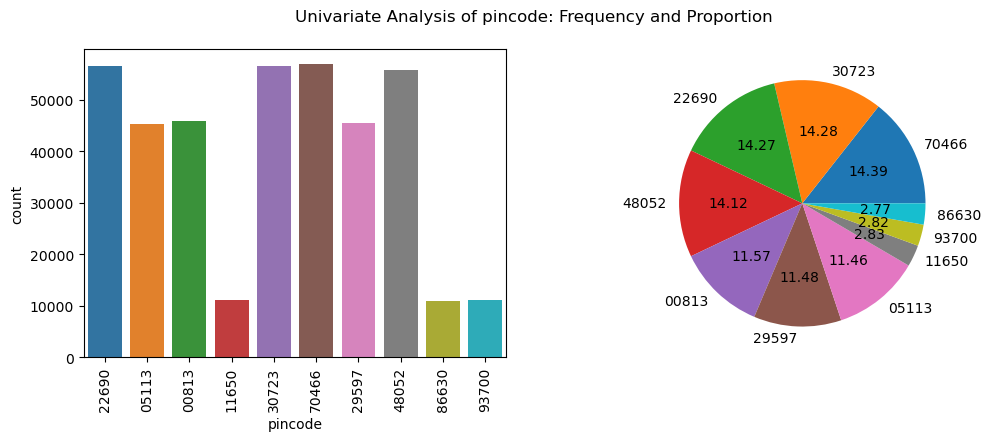

In [18]:
for feature in cat_features:
    univariate_plot_cat(raw_df, feature)

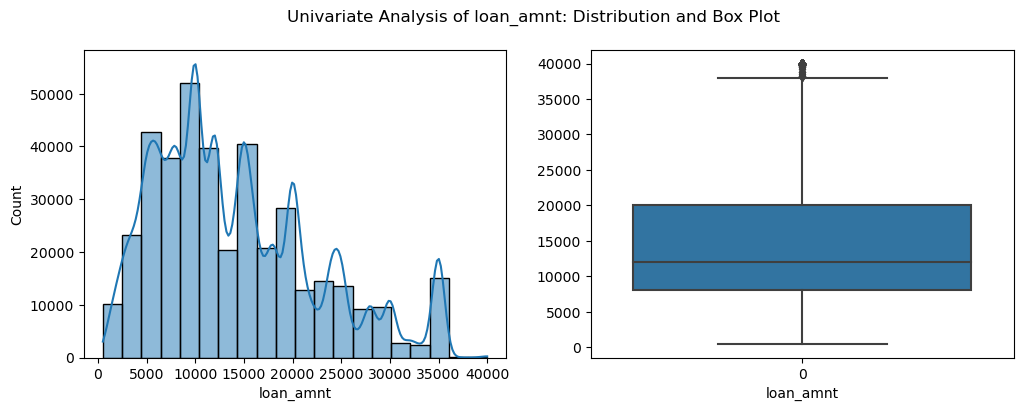

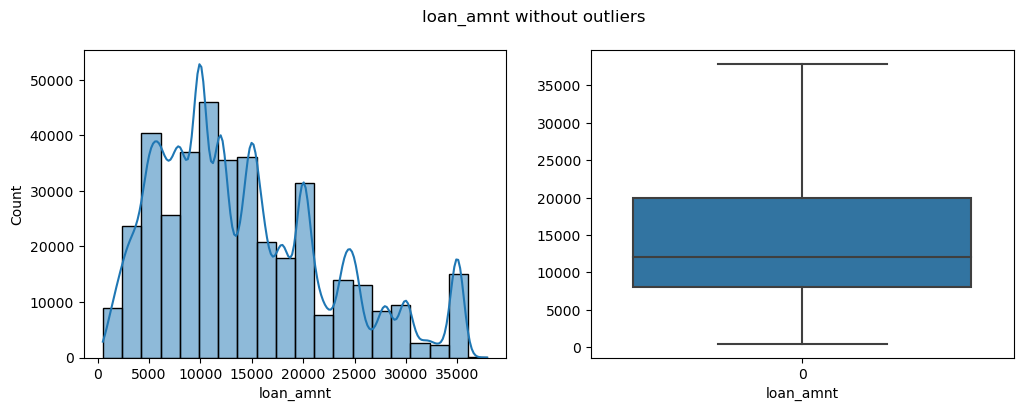

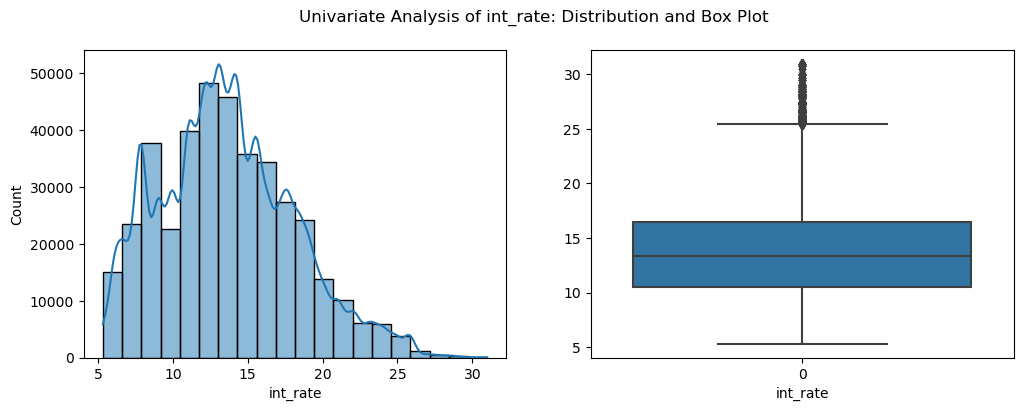

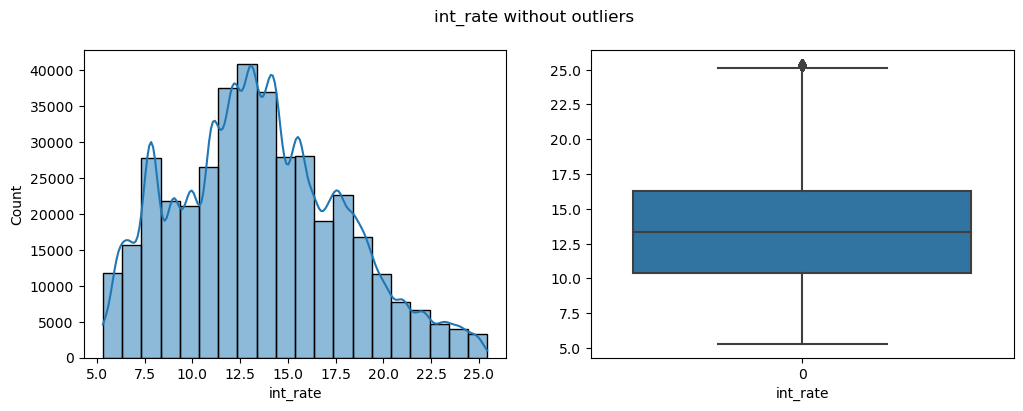

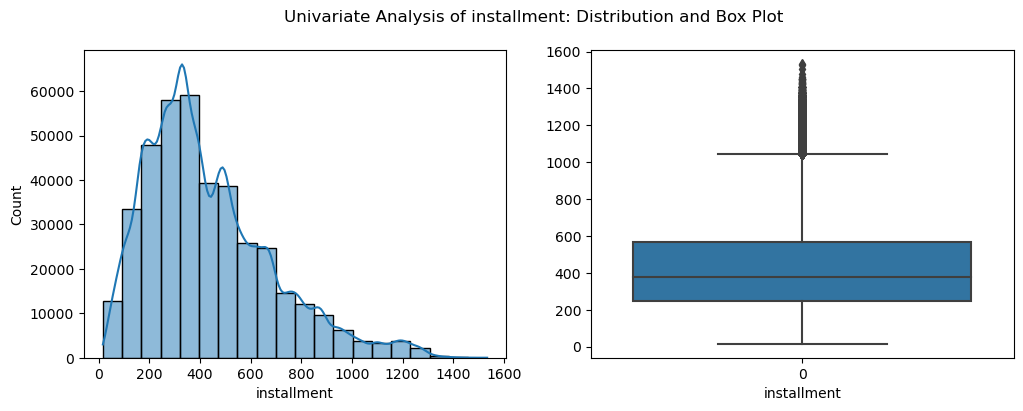

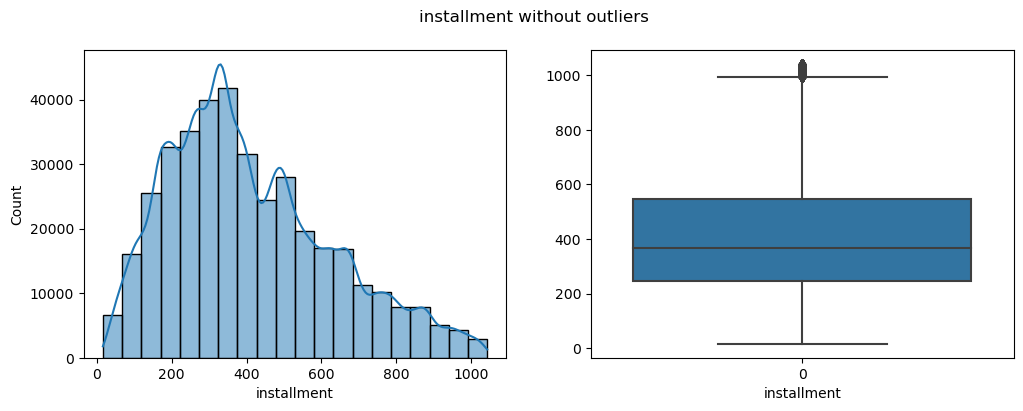

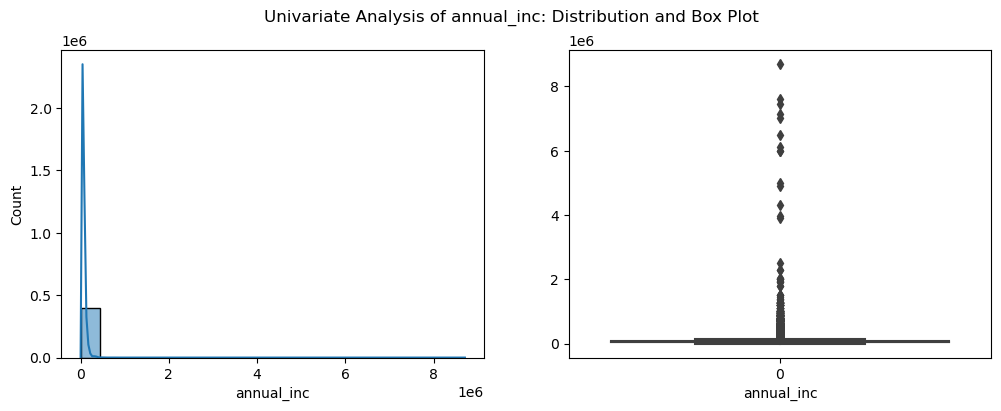

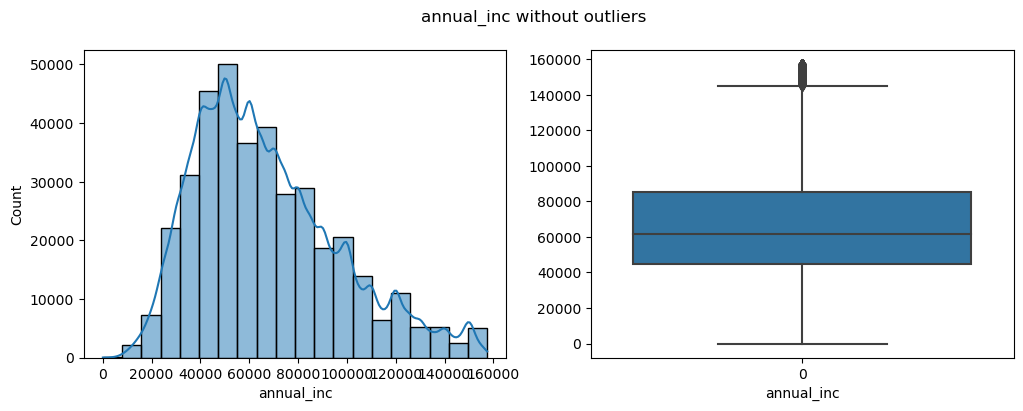

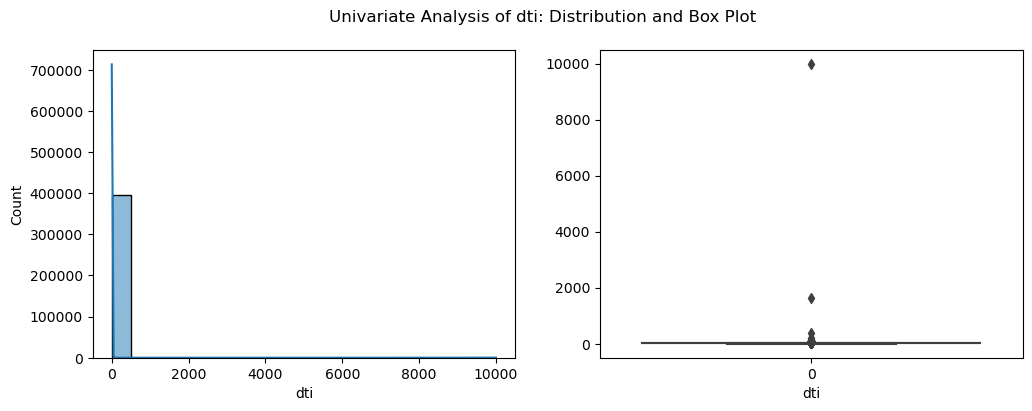

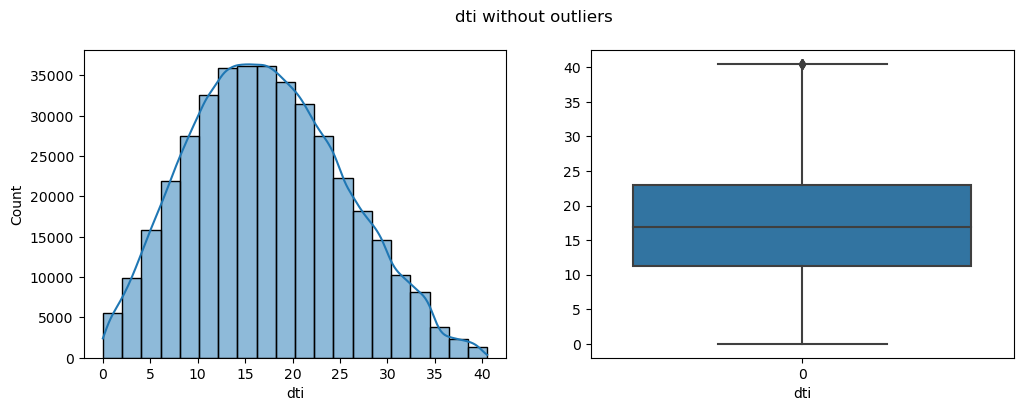

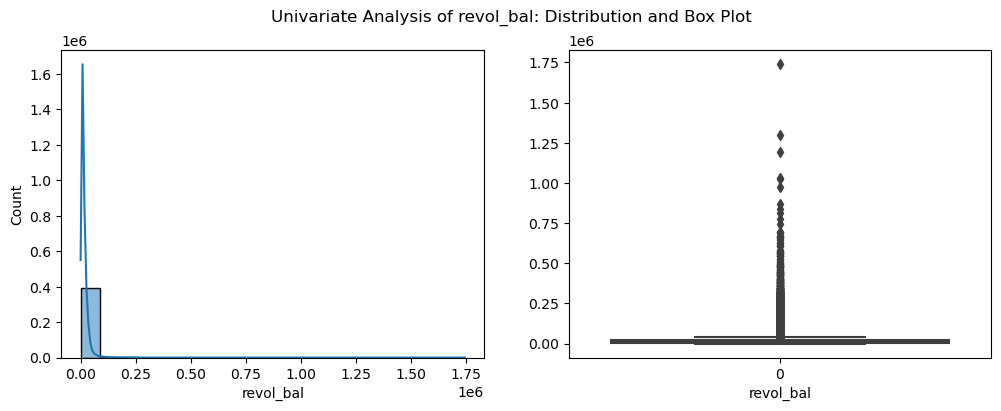

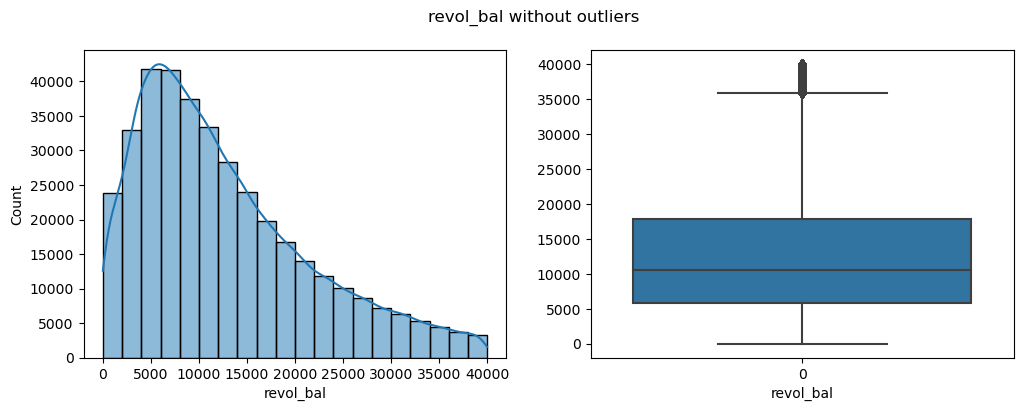

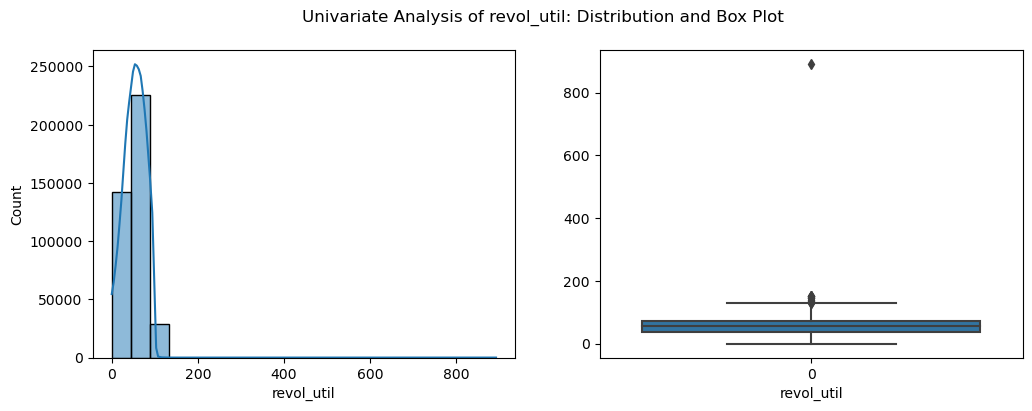

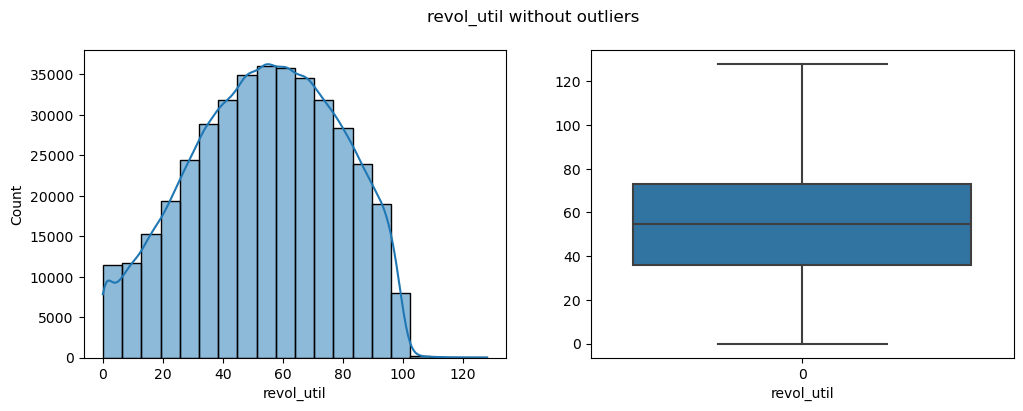

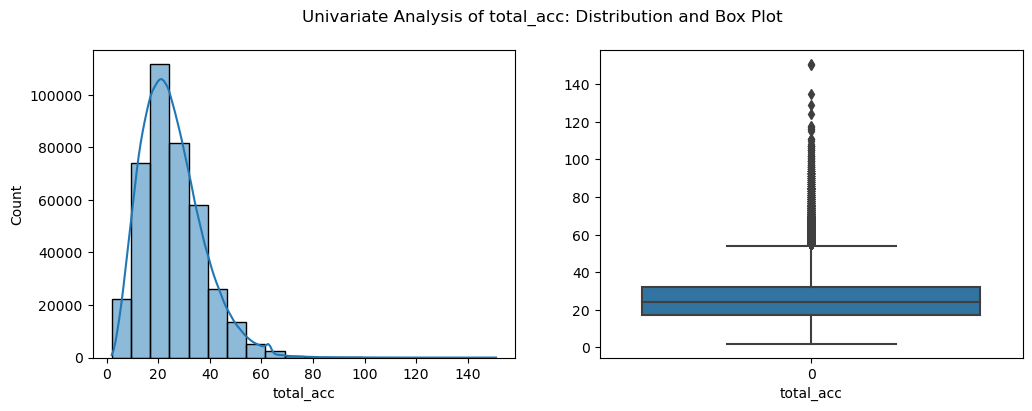

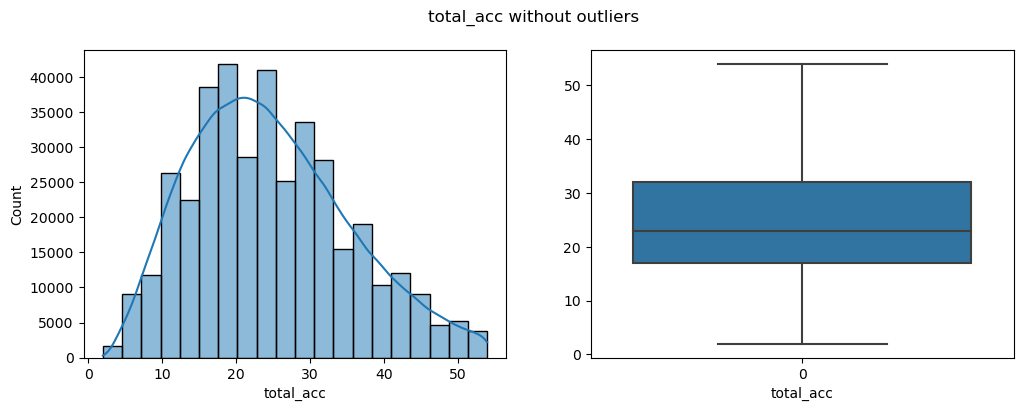

In [19]:
for feature in num_features:    
    univariate_plot_num(raw_df, feature)

## Categorical Feature Binning

In [20]:
#grade categories
cat_list = ['E', 'F', 'G']
target = 'E'
raw_df['grade'] = raw_df['grade'].apply(lambda x: target if x in cat_list else x)

In [21]:
#purpose categories
cat_list = ['debt_consolidation', 'credit_card']
target = 'Others'
raw_df['purpose'] = raw_df['purpose'].apply(lambda x: target if x not in cat_list else x)

In [22]:
#pincode categories
cat_list = ['86630', '93700', '11650']
target = 'Others'
raw_df['pincode'] = raw_df['pincode'].apply(lambda x: target if x in cat_list else x)

In [23]:
#home_ownership categories
cat_list = ['OTHER', 'NONE', 'ANY']
target = 'OTHER'
raw_df['home_ownership'] = raw_df['home_ownership'].apply(lambda x: target if x in cat_list else x)

In [24]:
#sub_grade categories
cat_list = [['E'+str(i), 'F'+str(i), 'G'+str(i)] for i in range(1, 6)]
target_list = ['E'+str(i) for i in range(1, 6)]
for i in range(len(target_list)):
    raw_df['sub_grade'] = raw_df['sub_grade'].apply(lambda x: target_list[i] if x in cat_list[i] else x)

In [25]:
#emp_length categories
target_list = ["0 to 2", "3 to 5", "6 to 9"]
cat_list = [["<1 year", "1 year", "2 years"], ["3 years", "4 years", "5 years"], ["6 years", "7 years", "8 years", "9 years"]]
for i in range(len(target_list)):
    raw_df['emp_length'] = raw_df['emp_length'].apply(lambda x: target_list[i] if x in cat_list[i] else x)

In [26]:
#pub_rec_bankruptcies categories
target = 1
raw_df['pub_rec_bankruptcies'] = raw_df['pub_rec_bankruptcies'].apply(lambda x: target if x > 0 else x)

In [27]:
#mort_acc categories
cat_list = [1, 3, 8, raw_df['mort_acc'].max()+1]
target = [1, 2, 3]
for i in range(len(cat_list)-1):
    raw_df['mort_acc'] = raw_df['mort_acc'].apply(lambda x: target[i] if x >= cat_list[i] and x < cat_list[i+1] else x)

In [28]:
#pub_rec categories
target = 2
raw_df['pub_rec'] = raw_df['pub_rec'].apply(lambda x: target if x >= 2 else x)

In [29]:
#open_acc categories
cat_list = [0, 5, 10, 15, 20, 25, raw_df['open_acc'].max()+1]
target = np.arange(6)
for i in range(len(cat_list)-1):
    raw_df['open_acc'] = raw_df['open_acc'].apply(lambda x: target[i] if x >= cat_list[i] and x < cat_list[i+1] else x)

## Outlier Analysis

In [30]:
feature = 'loan_amnt'
q1 = np.percentile(raw_df[feature], 25)
q3 = np.percentile(raw_df[feature], 75)
iqr = q3 - q1
print(feature, ":", len(raw_df[raw_df[feature]> (q3 + 1.5*iqr)]))

loan_amnt : 191


In [31]:
skew_list = []
kurt_list = []
for feature in num_features:
    skew_list.append(np.round(skew(raw_df[feature]),2))
    kurt_list.append(np.round(kurtosis(raw_df[feature]),2))
pd.DataFrame(data=[skew_list, kurt_list], index = ['Skew', 'Kurtosis'], columns=num_features)

loan_amnt  int_rate  installment  annual_inc        dti  revol_bal  \
Skew           0.78      0.42         0.98       41.04     431.05      11.73   
Kurtosis      -0.06     -0.14         0.78     4238.50  237920.67     384.22   

          revol_util  total_acc  
Skew             NaN       0.86  
Kurtosis         NaN       1.20

## Bivariate Analysis
- Categorical Vs Categorical Feature
- Numerical Vs Numerical Feature
- Categorical Vs Numerical Feature

## Multivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


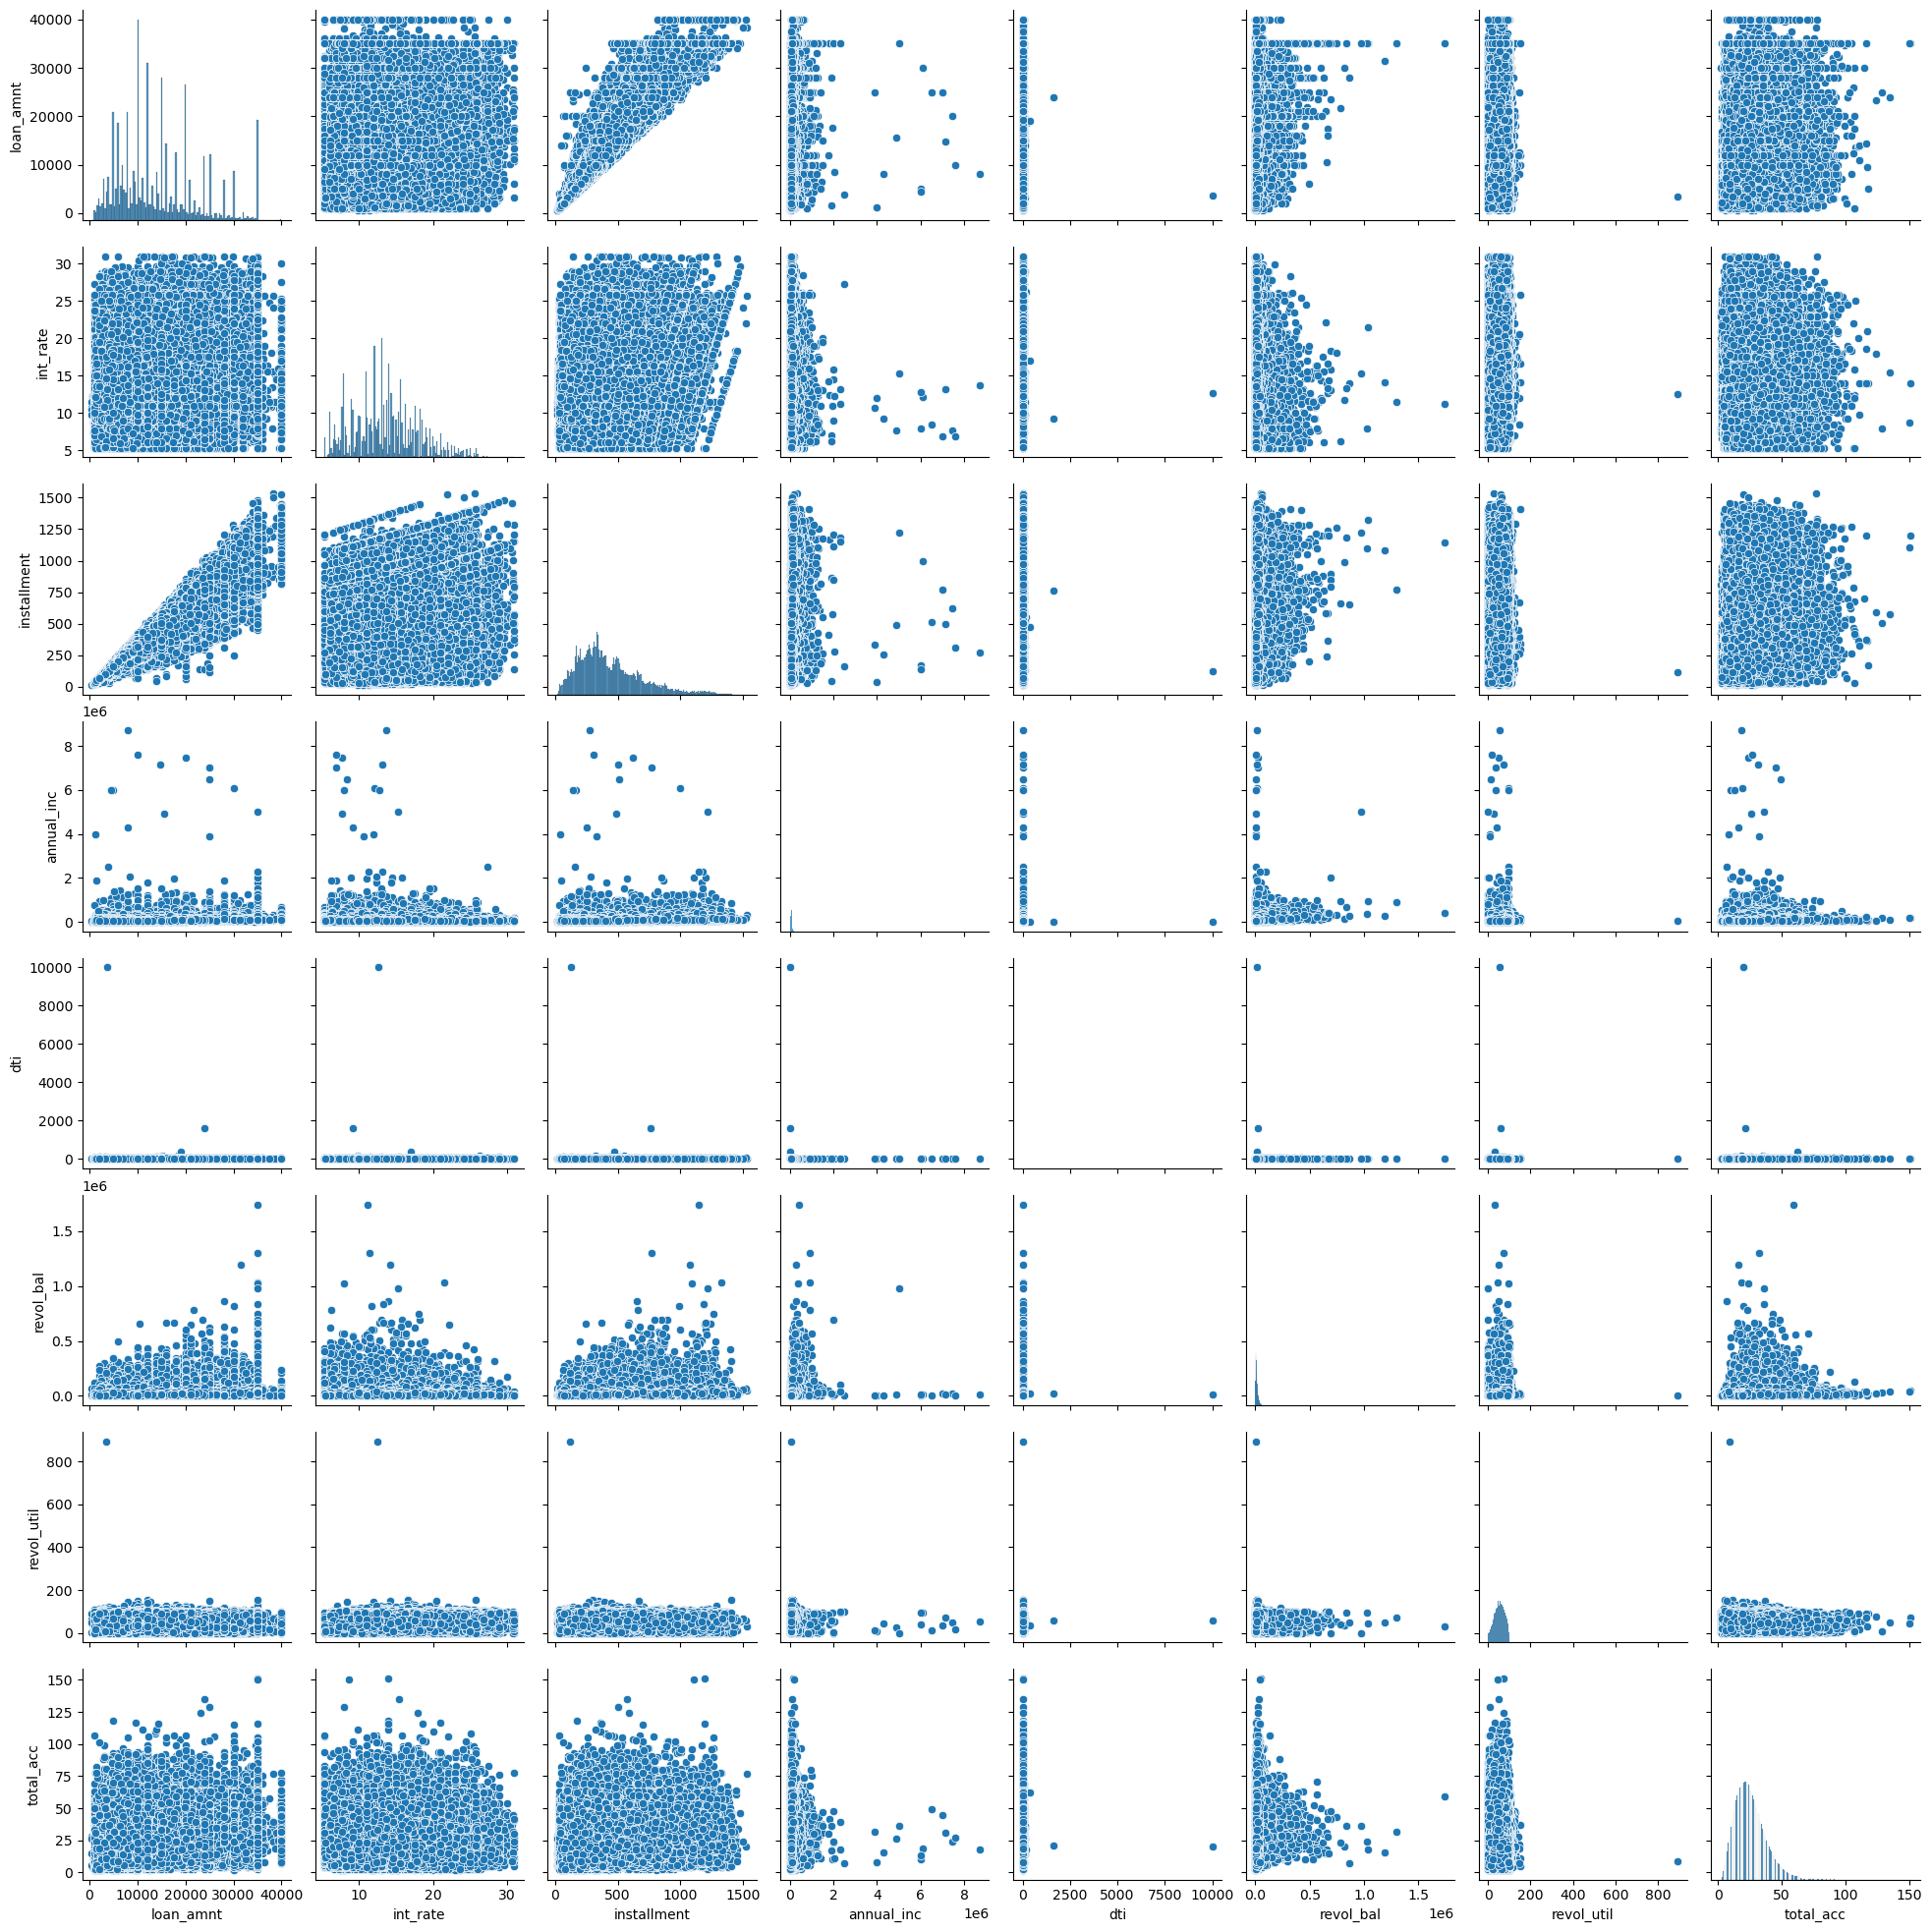

In [32]:
sns.pairplot(raw_df[num_features])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9320\383084018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), annot=True)


<Axes: >

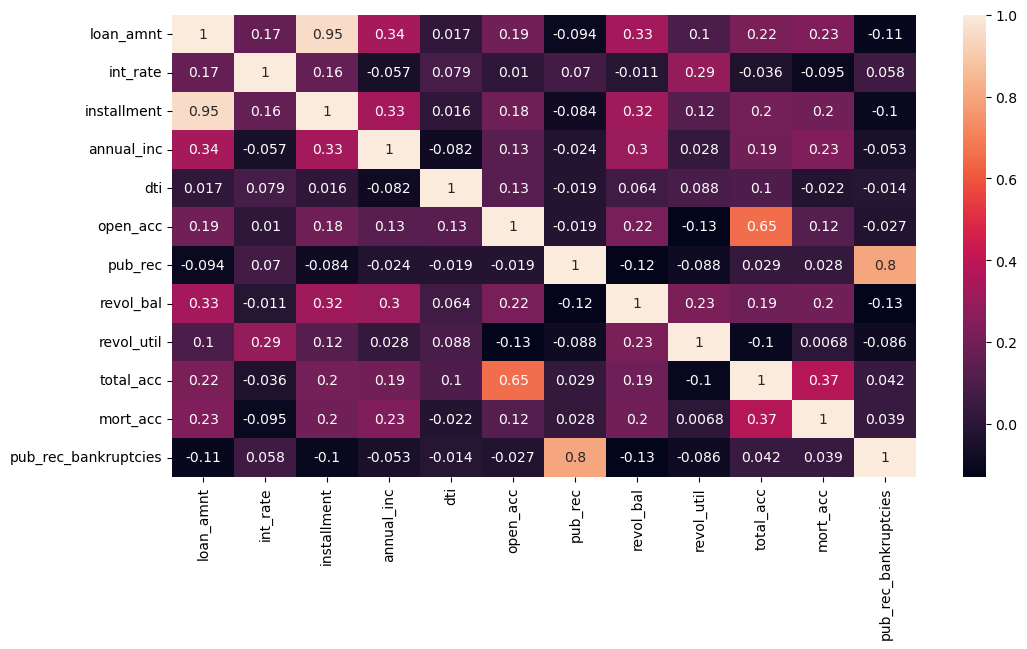

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(raw_df.corr(), annot=True)

#### Inference:
- Following features are highly correlated
    - loan amount and installment
    - open acc and total acc
    - pub rec and pub rec bankruptcies
- Other features doesn't have any significant correlation

## Target Variable Analysis
- BVA with each numerical and categorical features
- Target correlation with Features

### Loan Status vs Numerical Features

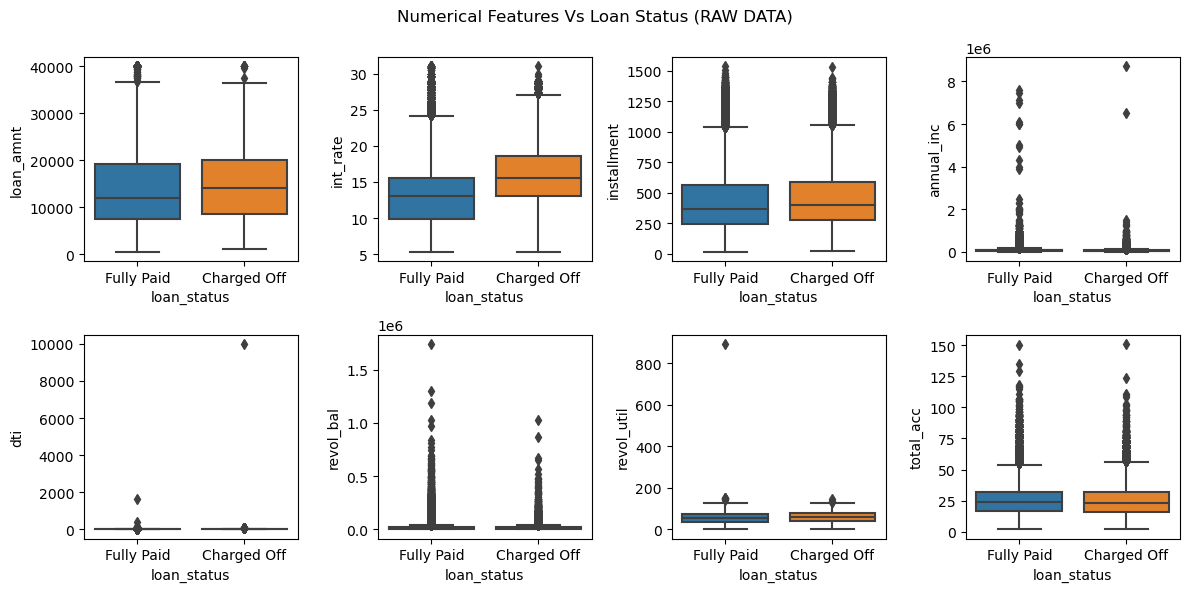

In [34]:
plt.figure(figsize=(12, 6))
plt.suptitle('Numerical Features Vs Loan Status (RAW DATA)')
for i in range(len(num_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=raw_df[num_features[i]], x = raw_df['loan_status'])
plt.tight_layout()

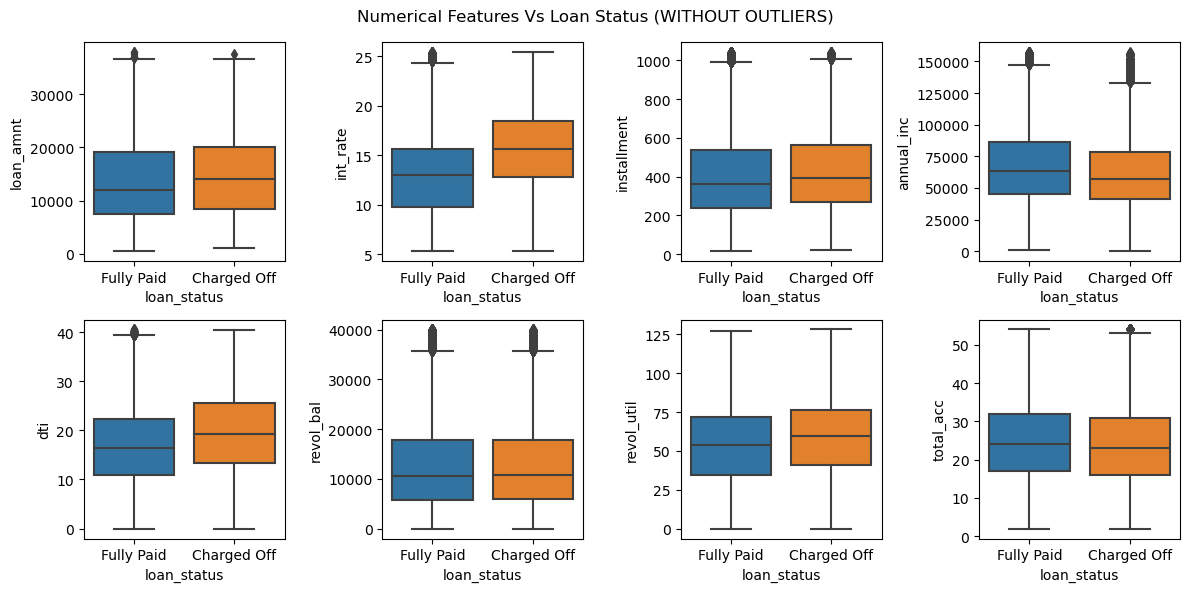

In [35]:
plt.figure(figsize=(12, 6))
plt.suptitle('Numerical Features Vs Loan Status (WITHOUT OUTLIERS)')
for i in range(len(num_features)):
    plt.subplot(2,4,i+1)
    iqr = outlier_detection(raw_df, num_features[i])    
    sns.boxplot(y=raw_df[raw_df[num_features[i]]<iqr[1]][num_features[i]], x = raw_df['loan_status'])
plt.tight_layout()

#### Inference:
- Outliers in the data make it challenging to draw meaningful inferences.
- A clear distinction is observed in the distribution of interest rate and DTI (debt-to-income ratio) between loyal customers and defaulters.
- Other features show no significant difference in their distribution relative to the target variable, though this needs to be validated through statistical tests.

### Loan Status vs Categorical Features

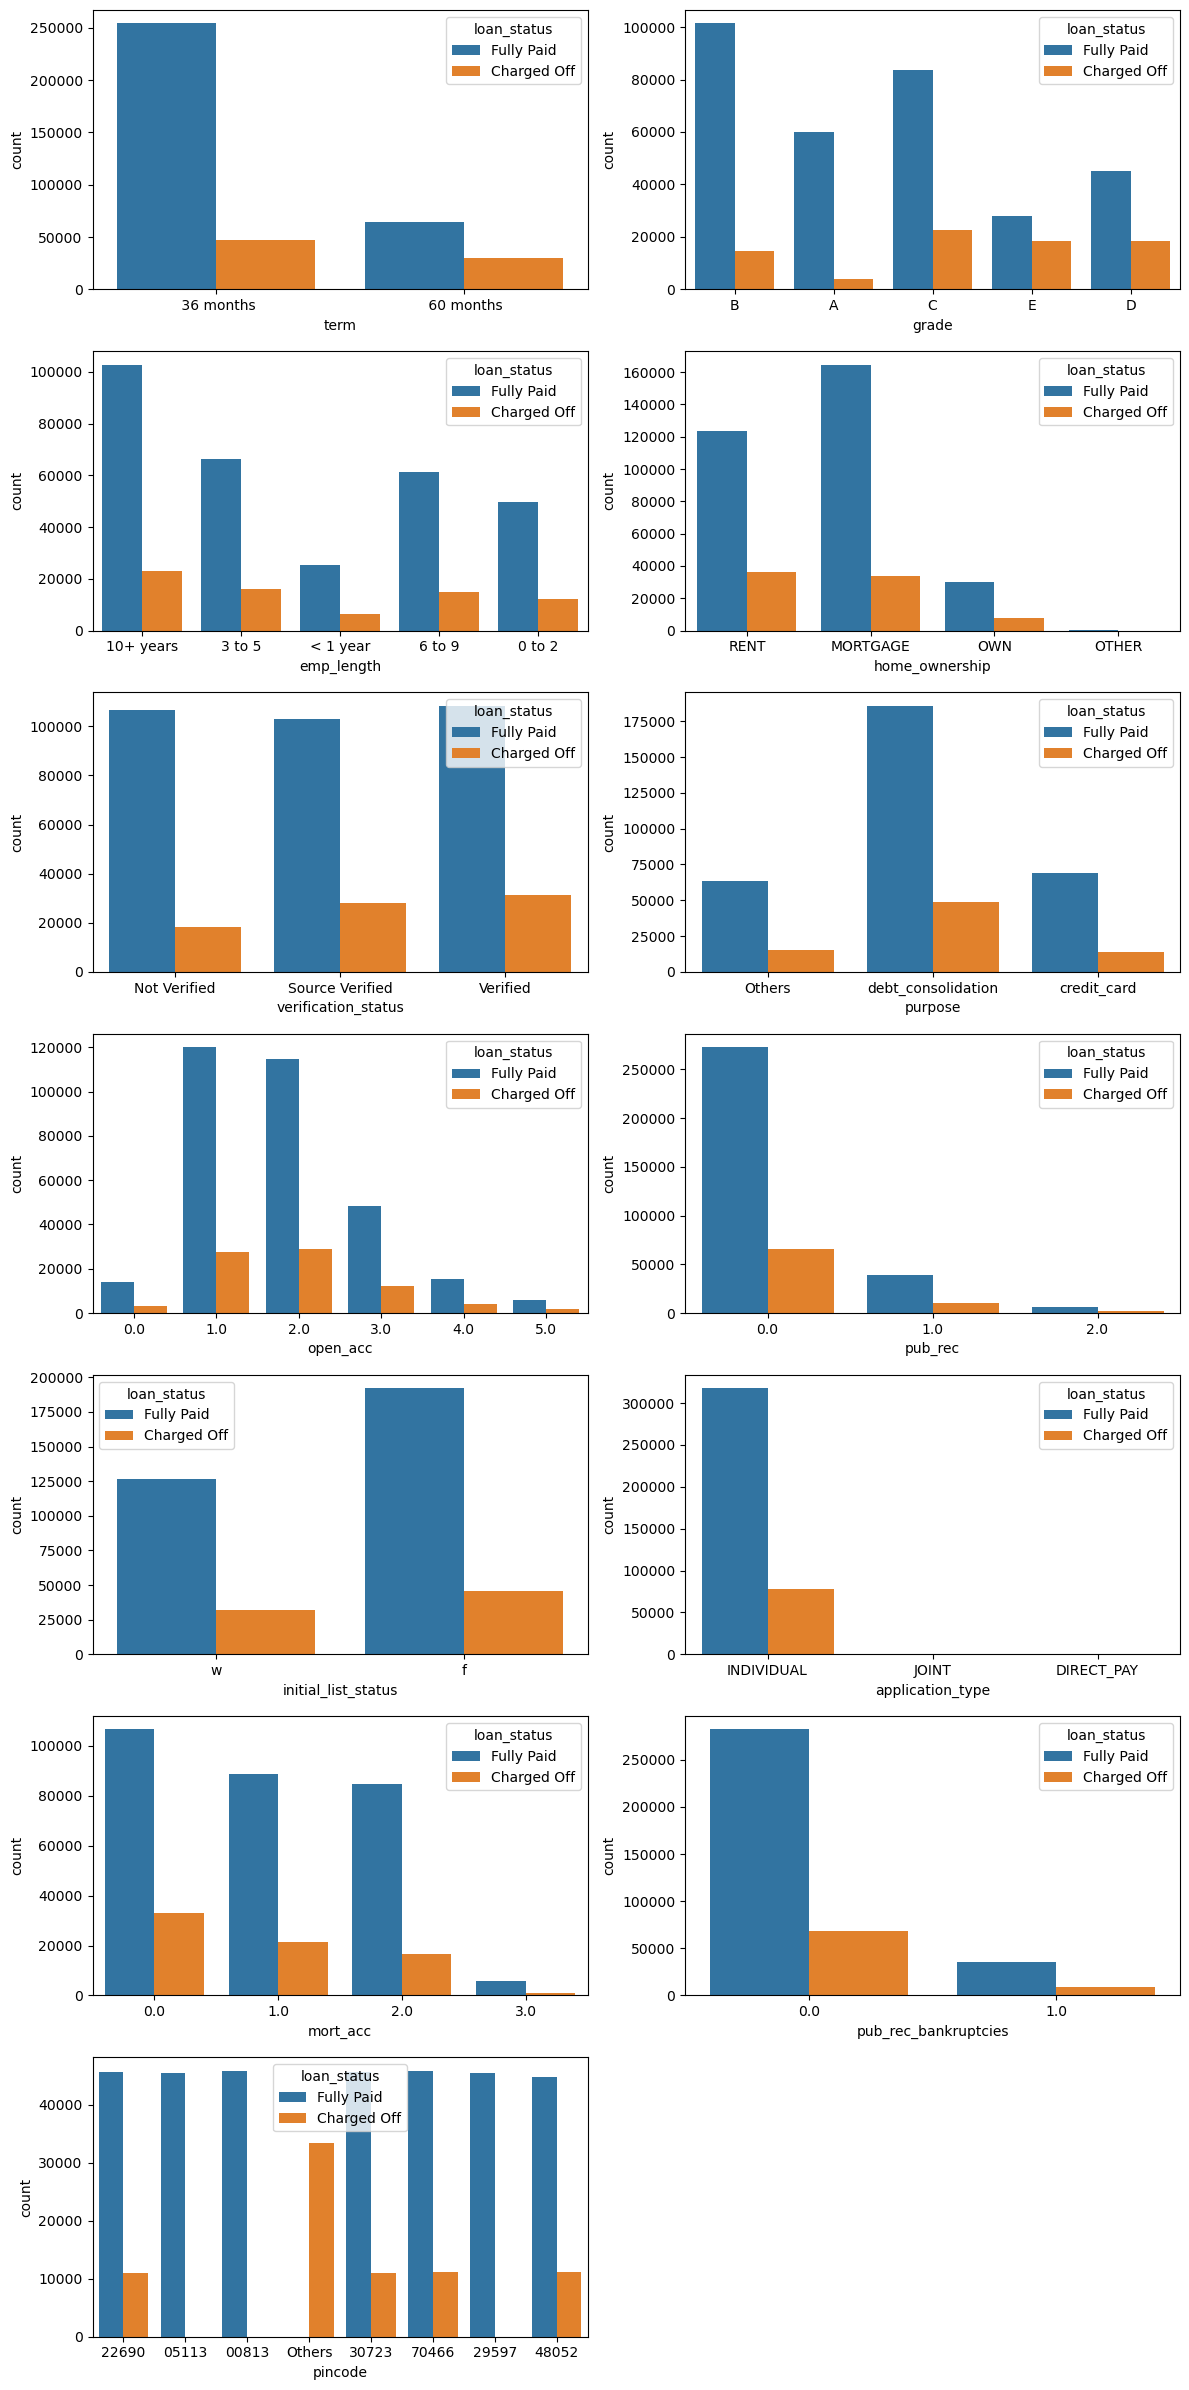

In [36]:
plt.figure(figsize=(12, 24))
skip_features = ['sub_grade', 'emp_title', 'title']
plt_cnt = 1
for feature in cat_features:
    if feature == 'loan_status' or feature in skip_features:
        continue
    plt.subplot(7,2,plt_cnt)
    sns.countplot(data = raw_df, x = feature, hue='loan_status')
    plt_cnt += 1
    #plt.ylim(0.4, 1)
plt.tight_layout()

<Axes: xlabel='issue_mon', ylabel='count'>

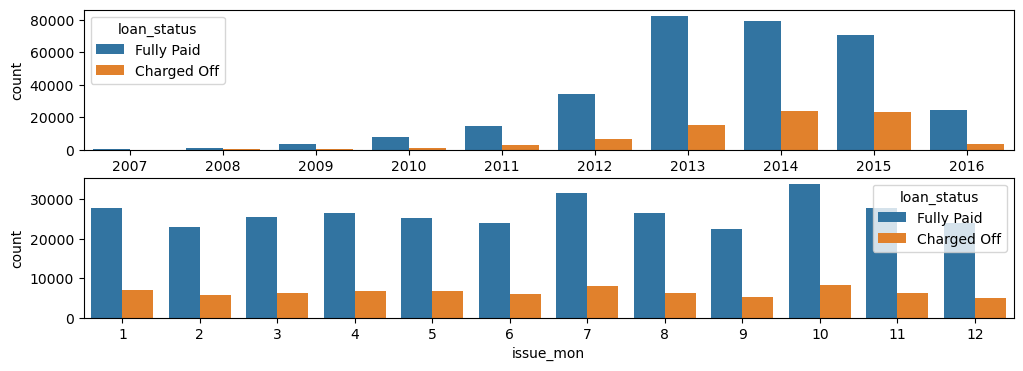

In [37]:
plt.figure(figsize=(12,4))
raw_df ['issue_yr'] = raw_df['issue_d'].dt.year
raw_df ['issue_mon'] = raw_df['issue_d'].dt.month
plt.subplot(2,1,1)
sns.countplot(data = raw_df, x = 'issue_yr', hue='loan_status')
plt.subplot(2,1,2)
sns.countplot(data = raw_df, x = 'issue_mon', hue='loan_status')

Text(0.5, 1.0, 'Churn Ratio over years')

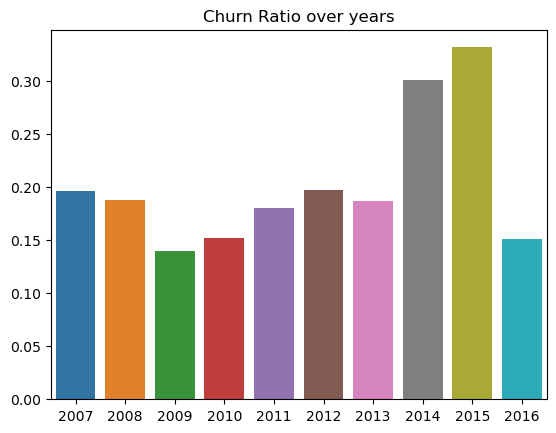

In [38]:
test = raw_df.groupby(['issue_yr', 'loan_status'])['loan_amnt'].count()
sns.barplot(x = raw_df['issue_yr'].unique(), y=[test.loc[year][0]/test.loc[year][1] for year in raw_df['issue_yr'].unique()])
plt.title('Churn Ratio over years')

Text(0.5, 1.0, 'Churn Ratio over Months')

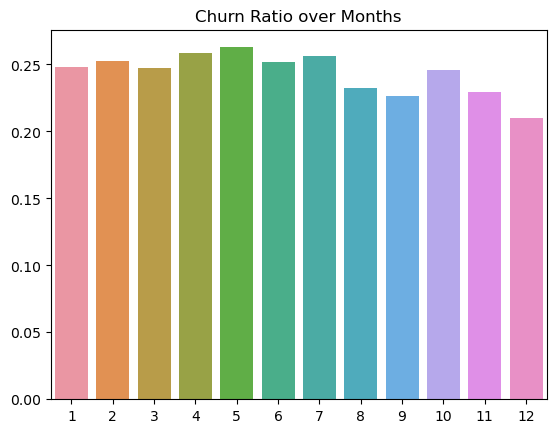

In [39]:
test = raw_df.groupby(['issue_mon', 'loan_status'])['loan_amnt'].count()
sns.barplot(x = raw_df['issue_mon'].unique(), y=[test.loc[mon][0]/test.loc[mon][1] for mon in raw_df['issue_mon'].unique()])
plt.title('Churn Ratio over Months')

<Axes: xlabel='sub_grade', ylabel='count'>

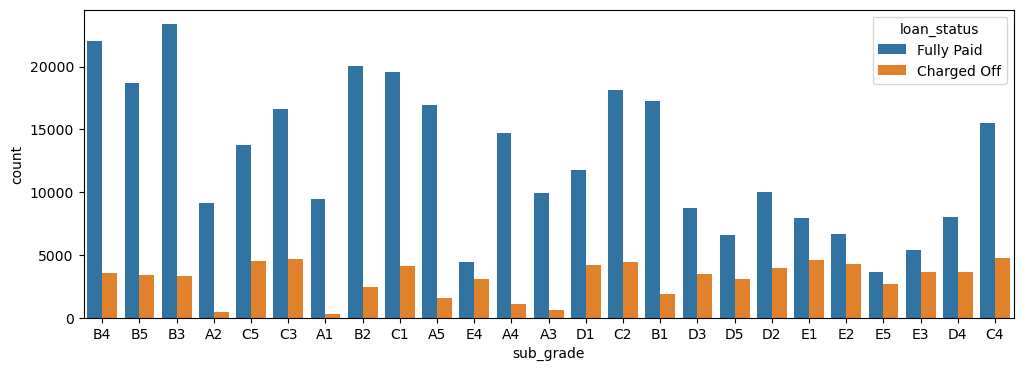

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(data = raw_df, x = 'sub_grade', hue='loan_status')

#### Inference:
- The ratio of fully paid loan to default loan is high on the year 2013
- People with grades ‘A’ are more likely to fully pay their loan
- Loans with a 60-month term are significantly more likely to result in default.
- Professionals with over 10 years of experience show a higher likelihood of defaulting on their loans.
- Verified accounts have a reduced likelihood of being charged off.
- Customers with 0 mortgage accounts are less prone to default.
- The geographical location (pincode) extracted from the address plays a crucial role in influencing loan defaults.
- Mortgaged homeowners show a significant tendency to default on their loans.
- Customers with an A-grade credit rating are substantially less likely to default.
- Other features do not show a significant impact on loan repayment behavior.
- Churn Ratio: No. of Charged off/No. of Fully paid
    - 2015 and 2016 years dominate in churn ratio, hence issue_yr is a contributing factor
    - Churn ratio over months shows similar trend, hence issue_mon doesn't provide significant contribution for churning

# Data Preprocessing
- Missing data analysis
- Outlier Treatment if necessary
- Feature Engineering
- Feature Scaling

## Textual Features

In [41]:
# Drop Textual Features
df = raw_df.copy()
df.drop(["emp_title", "title"], axis = 1, inplace=True)

## Missing Value Analysis

In [42]:
nulldata = df.isnull().sum()
na_cols = list(nulldata[nulldata>0].index)
df[na_cols].describe(include='all')

emp_length     revol_util       mort_acc  pub_rec_bankruptcies
count      377729  395754.000000  358235.000000         395495.000000
unique          5            NaN            NaN                   NaN
top     10+ years            NaN            NaN                   NaN
freq       126041            NaN            NaN                   NaN
mean          NaN      53.791749       0.930660              0.114072
std           NaN      24.452193       0.862799              0.317899
min           NaN       0.000000       0.000000              0.000000
25%           NaN      35.800000       0.000000              0.000000
50%           NaN      54.800000       1.000000              0.000000
75%           NaN      72.900000       2.000000              0.000000
max           NaN     892.300000       3.000000              1.000000

In [43]:
df[na_cols].isnull().sum()

emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [44]:
values = {"emp_length": df['emp_length'].mode()[0], "revol_util": np.median(df['revol_util'].dropna()), "mort_acc": df['mort_acc'].mode()[0], "pub_rec_bankruptcies": df['pub_rec_bankruptcies'].mode()[0]}
df.fillna(value=values, inplace=True)

#### Inference:
- As the features emp_length, mort_acc, pub_rec_bankruptcies are categorical, the missing values are replaced with mode
- As the mean and median of revol_util are almost equal, median is used to replace the missing the values

## Outlier Treatment

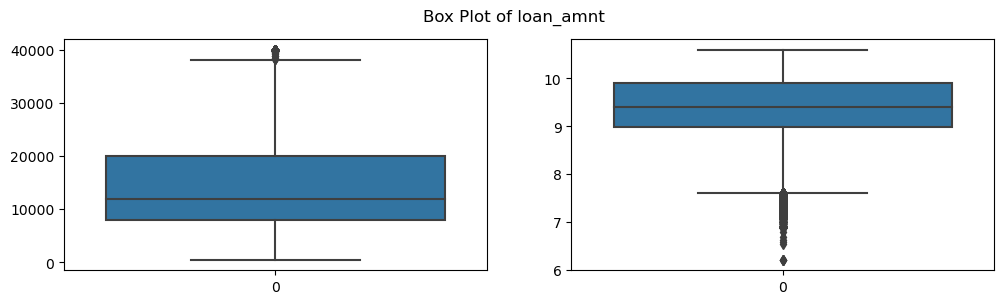

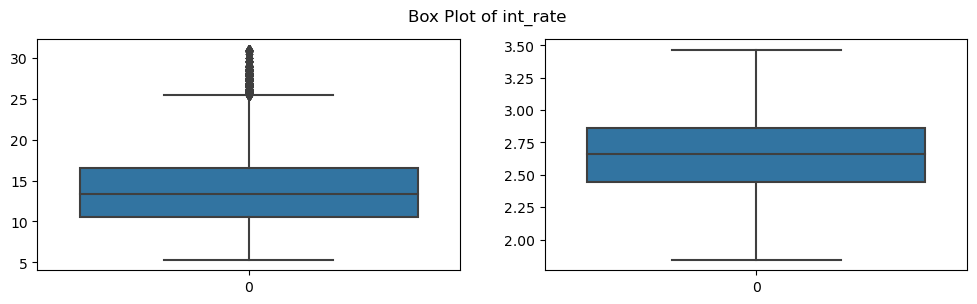

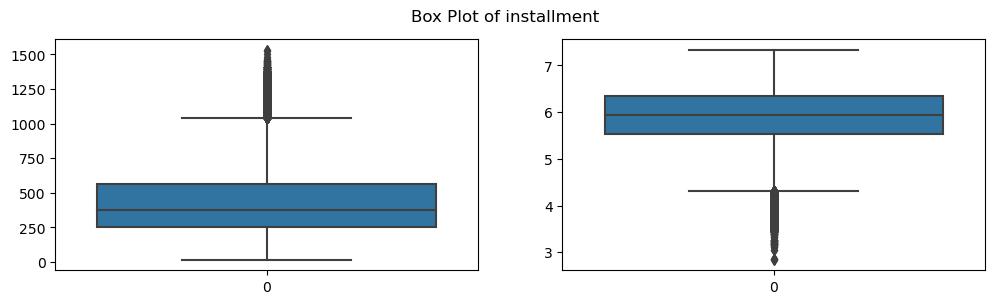

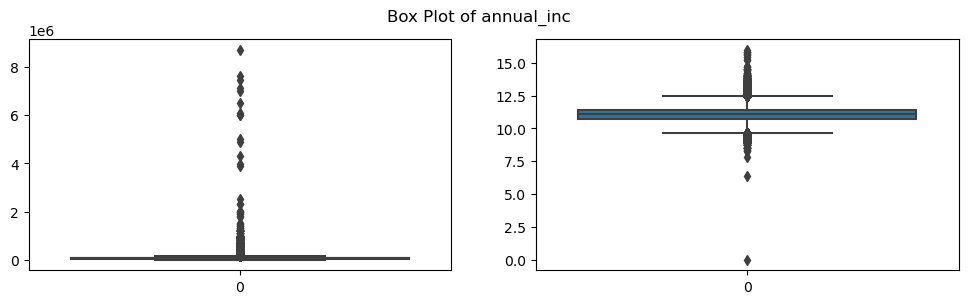

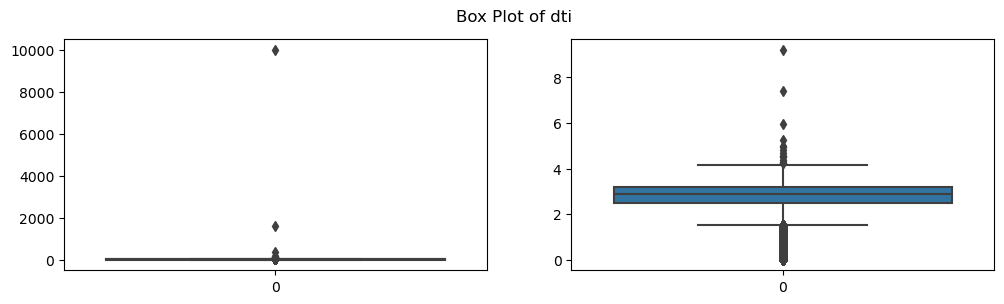

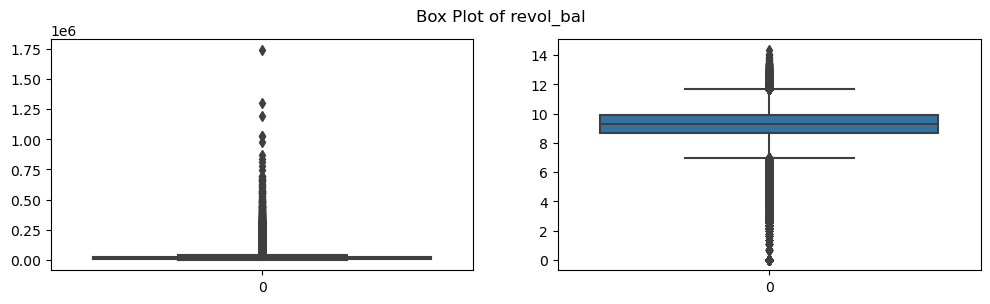

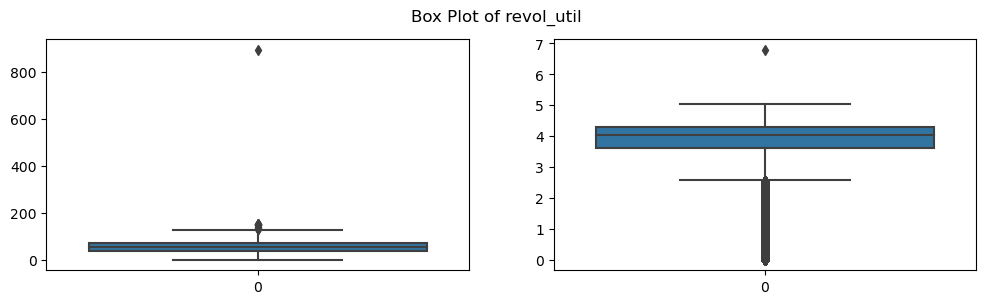

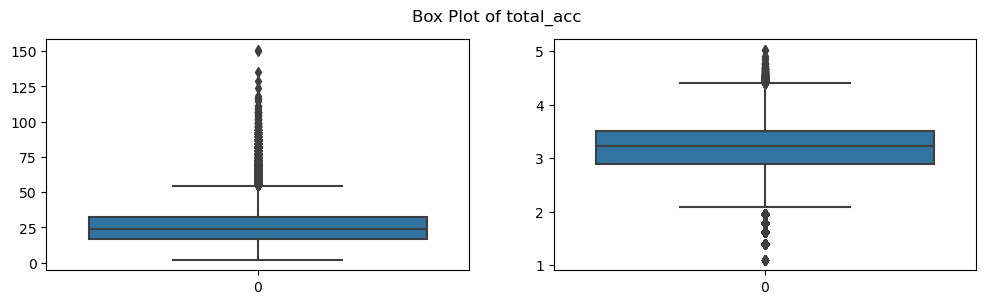

In [45]:
for feature in num_features:
    plt.figure(figsize=(12,3))
    iqr = outlier_detection(df, feature)
    #print(feature, iqr, len(df[df[feature] > iqr[1]][feature]))
    plt.suptitle("Box Plot of " + feature)
    plt.subplot(1,2,1)
    sns.boxplot(df[feature])
    plt.subplot(1,2,2)
    sns.boxplot(np.log1p(df[feature]))

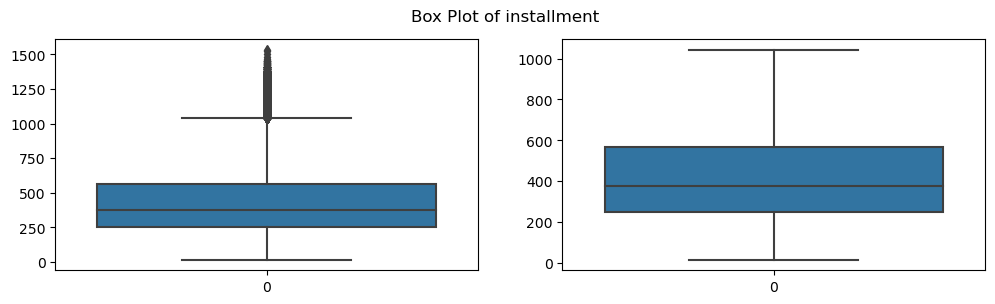

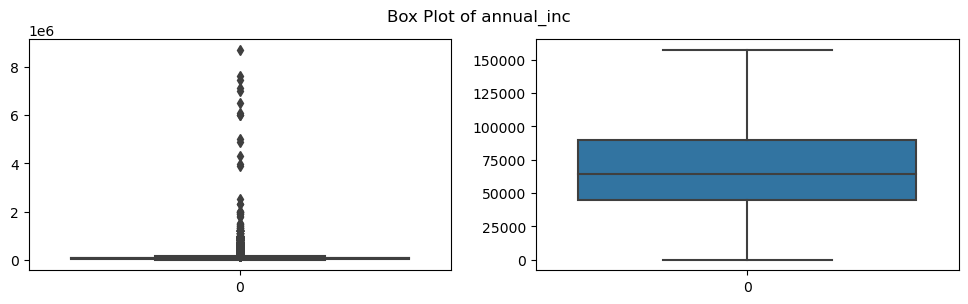

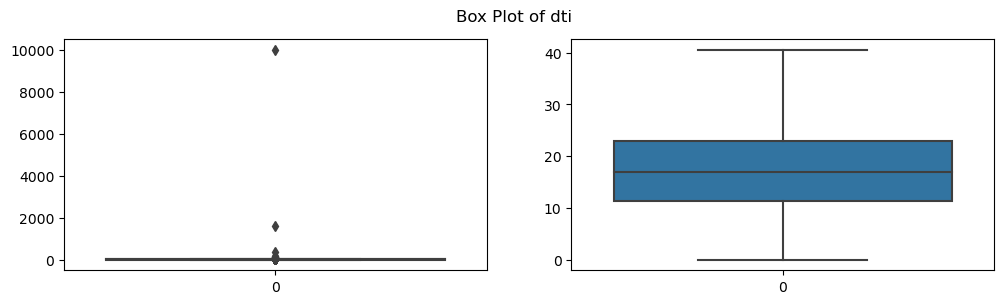

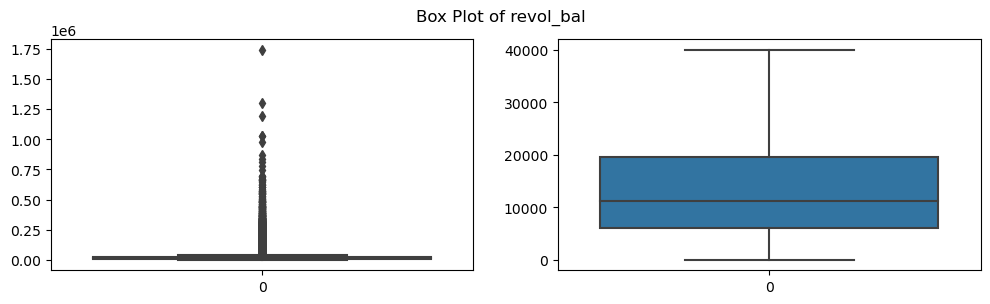

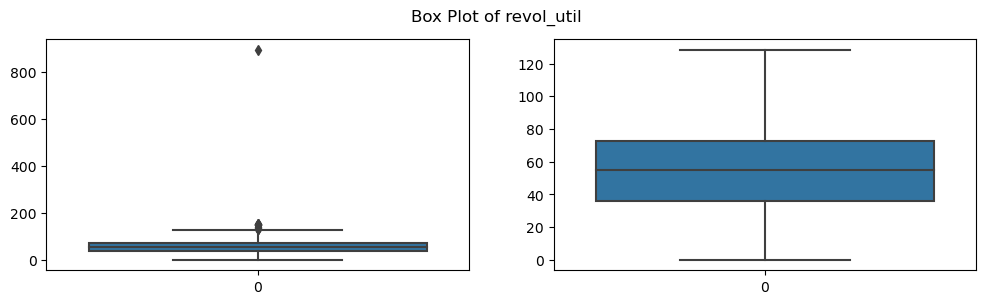

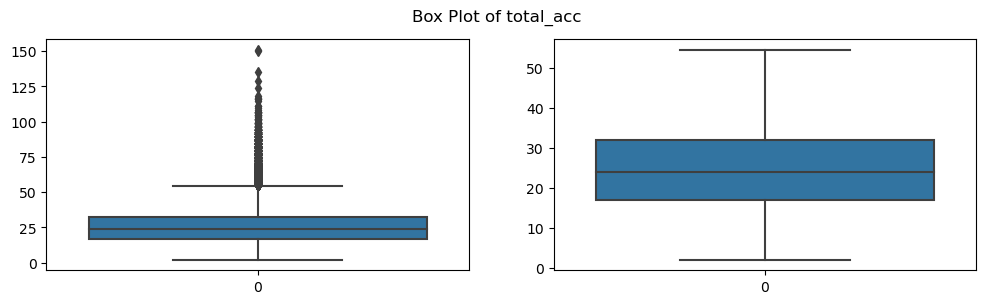

In [46]:
skip = ['loan_amnt', 'int_rate']
for feature in num_features:
    if feature in skip:
        continue
    plt.figure(figsize=(12,3))
    iqr = outlier_detection(df, feature)
    #print(feature, iqr, len(df[df[feature] > iqr[1]][feature]))
    plt.suptitle("Box Plot of " + feature)
    plt.subplot(1,2,1)
    sns.boxplot(df[feature])
    plt.subplot(1,2,2)
    df.loc[df[feature]>iqr[1],feature] = iqr[1]
    sns.boxplot(df[feature])


#### Inference:
- Outlier is not much significant for loan_amnt, hence can be ignored
- Outliers of int rate is handled using log transformation
- For other features, as the log transformation the outlier is far from the q3, hence upper bound is limited with iqr*1.5
- No Null values are observed
- From the above plot, No outliers are detected in numerical features

## Feature Engineering:
- Transform Features
- Categorical Encoding
- PCA

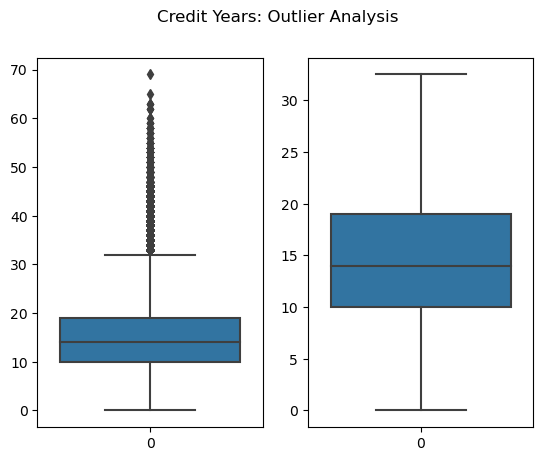

In [47]:
# Date Credit line to No. of credit years 
#Taken Max year in the dataset as reference

df['credit_years'] = max(df['earliest_cr_line'].dt.year) - df['earliest_cr_line'].dt.year
iqr = outlier_detection(df, 'credit_years')
plt.subplot(1,2,1)
sns.boxplot((max(raw_df['earliest_cr_line'].dt.year) - raw_df['earliest_cr_line'].dt.year))
df.loc[df['credit_years']>iqr[1],'credit_years'] = iqr[1]
plt.subplot(1,2,2)
sns.boxplot((df['credit_years']))
plt.suptitle("Credit Years: Outlier Analysis")
plt.show()

In [48]:
# Transform issue date to only year column
df['issue_year'] = df['issue_d'].dt.year

In [49]:
# Remove the base features earliest_cr_line and issue_d
df.drop(['earliest_cr_line', 'issue_d'], axis=1, inplace=True)

In [50]:
nominal_cat = ['home_ownership', 'verification_status','purpose', 'initial_list_status', 'application_type', 'pincode', 'loan_status']
ordinal_cat = ['term', 'grade', 'sub_grade', 'emp_length', 'open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
num_features = [feature for feature in list(df.columns) if feature not in nominal_cat + ordinal_cat]

## Categorical Encoding

In [51]:
#Target Encoding based on frequency is applied to all ordinal features
for feature in nominal_cat:
    df[feature] = df[feature].map(df[feature].value_counts())

In [52]:
#Label Encoding for nominal features 'term', 'grade', 'sub_grade'
l1 = ['term', 'grade', 'sub_grade']
for feature in l1:
    feature_enc = dict(zip(sorted(df[feature].unique()), np.arange(1, len(df[feature].unique())+1)))
    df[feature] = df[feature].map(feature_enc)

In [53]:
#Label Encoding for nominal features emp_length
feature_enc = {'< 1 year':1, '0 to 2':2, '3 to 5':3, '6 to 9':4, '10+ years':5}
df['emp_length'] = df['emp_length'].map(feature_enc)

In [54]:
#Label Encoding for nominal features 'open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies'
l2 = ['open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
for feature in l2:
    df[feature] = df[feature].astype('int')
    df[feature] = df[feature].apply(lambda x: x+1)

In [119]:
df['loan_status'] = df['loan_status'].map({318357:1,  77673:0})

In [56]:
df_backup = df.copy()

In [121]:
df = df_backup.copy()

#### Inference:
- earliest_cr_line is transformed to credit years and only year is extracted from issue date as new features
- For logistic regression modeling, all categorical features are encoded
    - Target encoding for Nominal features (replaced with its frequency)
    - Label encoding for Ordinal features is performed

## Principal Component Analysis

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [59]:
n = len(df.columns)-1
pl = Pipeline([
    ('Scaling', StandardScaler()),
    ('PCA', PCA(n_components=n))
])

In [60]:
pl.fit(df.drop('loan_status', axis=1))
pca_features = pl.transform(df.drop('loan_status', axis=1))
pca_model = pl.named_steps['PCA']

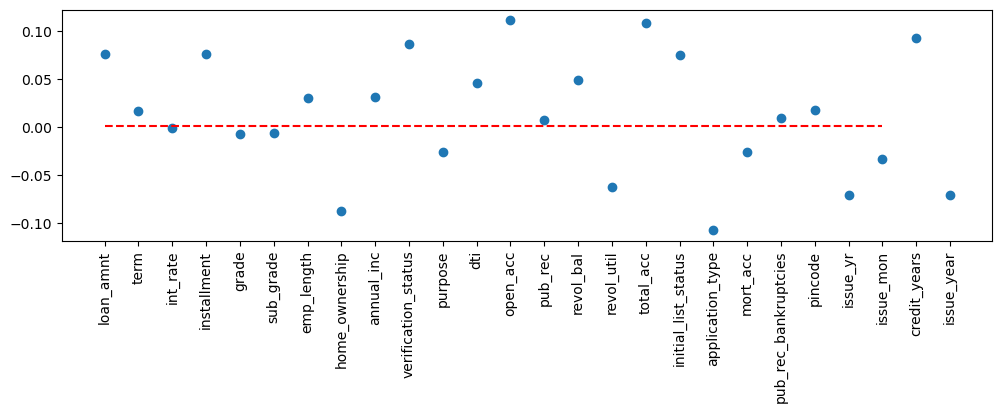

In [61]:
plt.figure(figsize=(12,3))
plt.plot(list(df.drop('loan_status', axis=1).columns), np.mean(pca_model.components_[0:10], axis=0),'o')
plt.xticks(rotation=90)
plt.hlines(pca_model.components_[0:15].mean(), xmin=0, xmax=23, colors='r', linestyles='dashed')
plt.show()


#### Inference:
- The first principal component, which explains approximately 65% of the variance in the data, is constructed with nearly equal contributions from all features in the dataset
- Since all the features equally contribute for PC1, all are comparably important in explaining the variance of the dataset

<Axes: >

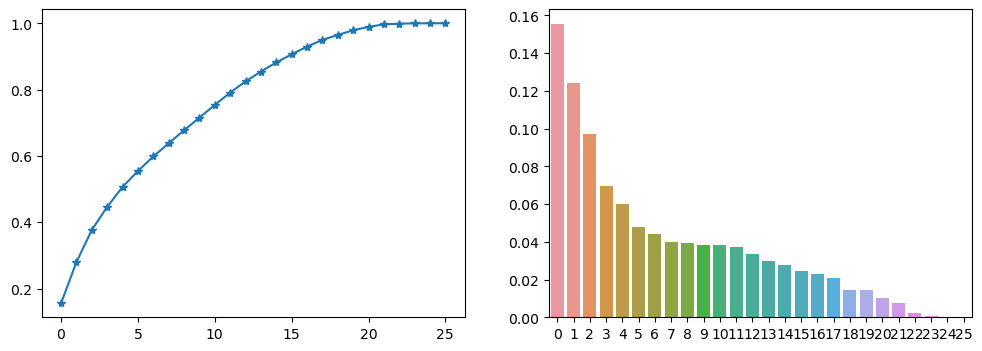

In [62]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="*")
plt.subplot(1,2,2)
sns.barplot(x= np.arange(len(pca_model.explained_variance_ratio_)), y=pca_model.explained_variance_ratio_)

#### Inference:
- Out of 24 features from the dataset, First 5 principal components captures >60% of variance in data
- Dimensionality reduction is possible by reducing 4-5 features as it captures <5% of variance in data

# Statistical Tests
- T-Test: 2 Sample T-Test
    - Target Vs Numerical Features
- Contingency Test: Test of Independence
    - Between Categorical Features

## 2 Sample T-Test

In [63]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from itertools import combinations

In [66]:
def two_sample_ttest(df, feature):
    samp1 = df[df['loan_status'] == 1][feature]
    samp2 = df[df['loan_status'] == 0][feature]
    tstat, pval = ttest_ind(samp1, samp2, alternative = 'two-sided')
    if pval < 0.05:
        print(f"The means of the {feature}: {np.mean(samp1).round(2)},{np.mean(samp2).round(2)} are significantly different (reject null hypothesis).")
    else:
        print(f"No significant difference between the means of the {feature}: {np.mean(samp1).round(2)},{np.mean(samp2).round(2)} (fail to reject null hypothesis).")

In [67]:
for feature in num_features:
    two_sample_ttest(df, feature)

The means of the loan_amnt: 15126.3,13866.88 are significantly different (reject null hypothesis).
The means of the int_rate: 15.88,13.09 are significantly different (reject null hypothesis).
The means of the installment: 448.82,423.16 are significantly different (reject null hypothesis).
The means of the annual_inc: 65278.4,72382.91 are significantly different (reject null hypothesis).
The means of the dti: 19.52,16.81 are significantly different (reject null hypothesis).
No significant difference between the means of the revol_bal: 14112.35,14181.81 (fail to reject null hypothesis).
The means of the revol_util: 57.87,52.8 are significantly different (reject null hypothesis).
The means of the total_acc: 24.83,25.37 are significantly different (reject null hypothesis).
The means of the issue_yr: 2013.81,2013.58 are significantly different (reject null hypothesis).
The means of the issue_mon: 6.44,6.58 are significantly different (reject null hypothesis).
The means of the credit_years: 

#### Inference:
- The means of the numerical features based on loan status show significant differences, suggesting that these features could effectively classify loan status.
- However, for the feature revol_bal, the means are not significantly different, indicating that this feature may have limited utility in distinguishing between loan statuses during modeling

In [68]:
def chitest(df, feature):
    ct = pd.crosstab(df['loan_status'], df[feature])
    chi_stat, p_value, _, exp_freq = chi2_contingency(ct)
    if p_value < 0.05:
        print(f"The {feature} and loan status are significantly dependent (reject null hypothesis)")
    else:
        print(f"The {feature} and target are significantly independent (fail to reject null hypothesis)")

In [69]:
for feature in nominal_cat + ordinal_cat:
    chitest(df, feature)

The home_ownership and loan status are significantly dependent (reject null hypothesis)
The verification_status and loan status are significantly dependent (reject null hypothesis)
The purpose and loan status are significantly dependent (reject null hypothesis)
The initial_list_status and loan status are significantly dependent (reject null hypothesis)
The application_type and loan status are significantly dependent (reject null hypothesis)
The pincode and loan status are significantly dependent (reject null hypothesis)
The loan_status and loan status are significantly dependent (reject null hypothesis)
The term and loan status are significantly dependent (reject null hypothesis)
The grade and loan status are significantly dependent (reject null hypothesis)
The sub_grade and loan status are significantly dependent (reject null hypothesis)
The emp_length and loan status are significantly dependent (reject null hypothesis)
The open_acc and loan status are significantly dependent (reject 

#### Inference:
- The contingency test confirms that loan status is dependent on most of the categorical features, suggesting their effectiveness in classifying loan status.
- However, the features pub_rec and pub_rec_bankruptcies show no dependency on loan status, indicating that these features may have limited influence on classification.

# Modeling
- Train Test Split and Feature Scaling
- Linear Regression
    - Performance Analysis using MAE, MSE and Adj R2 Score
- Polynomial Regression
    - KFold CV and Hyperparameter Tuning
- Lasso Regression
- Ridge Regression

## Data Preparation for Modeling

In [128]:
scaler = StandardScaler()
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [129]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=101, shuffle=True, )
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
ytrain.reset_index(drop=True, inplace=True)
ytest.reset_index(drop=True, inplace=True)

## Logistic Regression

In [130]:
lor = LogisticRegression()
lor.fit(xtrain_scaled, ytrain)

LogisticRegression()

In [131]:
ypred = lor.predict(xtest_scaled)
ypred_prob = lor.predict_proba(xtest_scaled)[:,1]

### Performance Analysis

In [74]:
def performance_metrics(ytest, ypred):
    tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
    actual_pos = tp + fn
    actual_neg = fp + tn
    p = precision_score(ypred,ytest)
    r = recall_score(ypred,ytest)
    print("True Positive Rate: ", round(tp/actual_pos,2))
    print("True Negative Rate: ", round(tn/actual_neg,2))
    print("False Positive Rate: ", round(fp/actual_neg,2))
    print("False Negative Rate: ", round(fn/actual_pos,2))
    print("Accuracy: ", accuracy_score(ypred,ytest).round(2))
    print("Precision: ", p.round(2))
    print("Recall: ", r.round(2))
    print("F1 Score: ", round(2*r*p/(r+p),2))
    

In [75]:
def plot_roc(ytest, ypred_prob):
    fpr, tpr, thresholds = roc_curve(ytest, ypred_prob)
    plt.plot(fpr, tpr, label='ROC Curve (Area: ' + str(auc(fpr, tpr).round(2)) + ')' )
    plt.plot([0, 1], [0, 1], 'k--', label='Average')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    return fpr, tpr, thresholds

In [76]:
def plot_prc(ytest, ypred_prob, label):
    precision, recall, thresholds = precision_recall_curve(ytest, ypred_prob, pos_label=label)
    no_skill = len(ytest[ytest==label]) / len(ytest)
    plt.plot(recall, precision, label='Precision Recall Curve (Area: ' + str(auc(recall, precision).round(2)) + ')' )
    plt.plot([0, 1], [no_skill, no_skill], 'k--', label='Average')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    return precision, recall, thresholds

In [77]:
def plot_conf_matrix(test, pred):
    plt.figure(figsize=(1,1))
    cm = confusion_matrix(test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues')
    plt.show()

In [84]:
def OptimumThreshold(precision, recall, thresholds):
    optimal_idx = np.abs(precision - recall).argmin()  # Example: trade-off point
    return thresholds[optimal_idx]

In [132]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.77      0.27      0.40     23260
           1       0.85      0.98      0.91     95549

    accuracy                           0.84    118809
   macro avg       0.81      0.63      0.65    118809
weighted avg       0.83      0.84      0.81    118809



<Figure size 100x100 with 0 Axes>

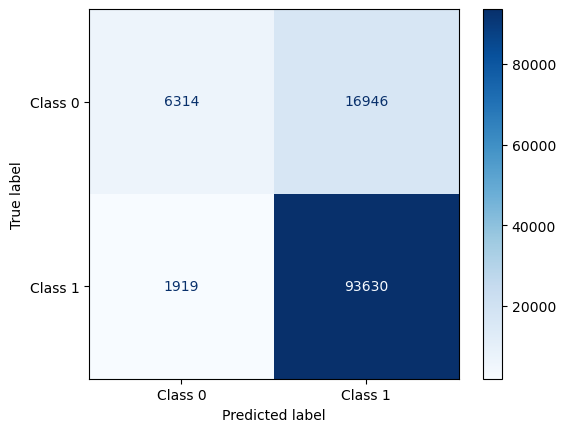

In [133]:
plot_conf_matrix(ytest, ypred)

In [134]:
performance_metrics(ytest, ypred)

True Positive Rate:  0.98
True Negative Rate:  0.27
False Positive Rate:  0.73
False Negative Rate:  0.02
Accuracy:  0.84
Precision:  0.98
Recall:  0.85
F1 Score:  0.91


#### Inference:
- Prediction of positive class is satisfactory as it achieves high precision and recall. High precision may also be the reason that the positive class is the majority class.
- **High False Positive Rate (FPR):**
    - `Misclassification of defaulters: The bank incorrectly approves loans for defaulters.`
    - `This can result in significant revenue loss, as the bank risks losing the loan's principal amount, which may outweigh potential gains from interest.`
- False positive rate to be minimized
- False negative rate is minimal and it is acceptable

#### ROC Analysis

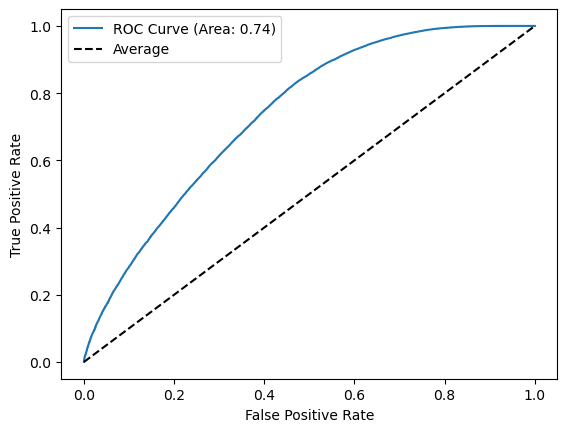

In [135]:
plot_roc(ytest, ypred_prob)
plt.show()

#### Inference:
- AUC of 0.74 indicates that the model has a moderate level of discriminatory ability. This means the model can differentiate between the positive and negative classes better than random guessing
- Due to Class imbalancing in the dataset, PR curve needs to be studied

#### Precision Recall Curve Analysis

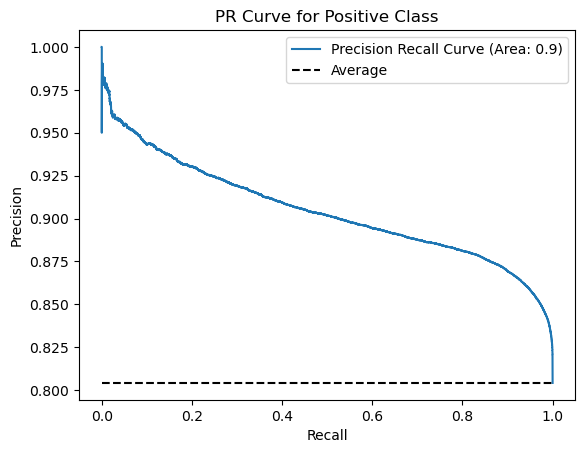

In [136]:
ypred_prob = lor.predict_proba(xtest_scaled)[:,1]
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

In [137]:
# Optimal Threshold Selection
optim_th = OptimumThreshold(p, r, th)
ypred_optim = np.zeros(shape=ypred.shape)
ypred_optim[ypred_prob > optim_th] = 1
print(bold_start + "Optimal Threshold :" + bold_end, round(optim_th,2))
print(classification_report(ytest, ypred_optim))

Optimal Threshold : 0.7
              precision    recall  f1-score   support

           0       0.48      0.48      0.48     23260
           1       0.87      0.87      0.87     95549

    accuracy                           0.80    118809
   macro avg       0.68      0.68      0.68    118809
weighted avg       0.80      0.80      0.80    118809



<Figure size 100x100 with 0 Axes>

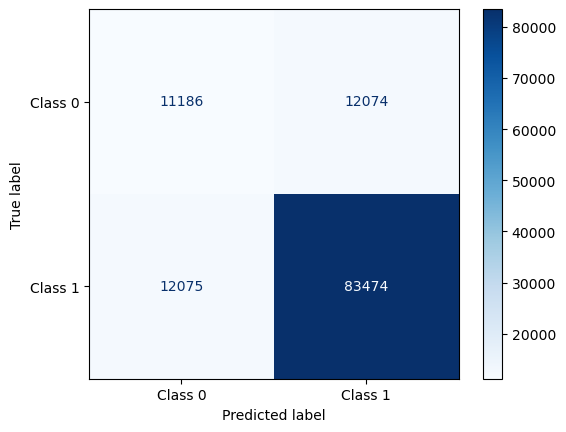

In [138]:
plot_conf_matrix(ytest,ypred_optim)

In [139]:
performance_metrics(ytest,ypred_optim)

True Positive Rate:  0.87
True Negative Rate:  0.48
False Positive Rate:  0.52
False Negative Rate:  0.13
Accuracy:  0.8
Precision:  0.87
Recall:  0.87
F1 Score:  0.87


#### Inference:
- Based on the PR curve of positive class, an optimal threshold value is chosen (by trade off between precision and recall)
- It significantly reduces the false positive rate by 20%
- Also it improves the f1 score of negative class by 10%
- Further class imbalances to be removed to improve the performance of the model

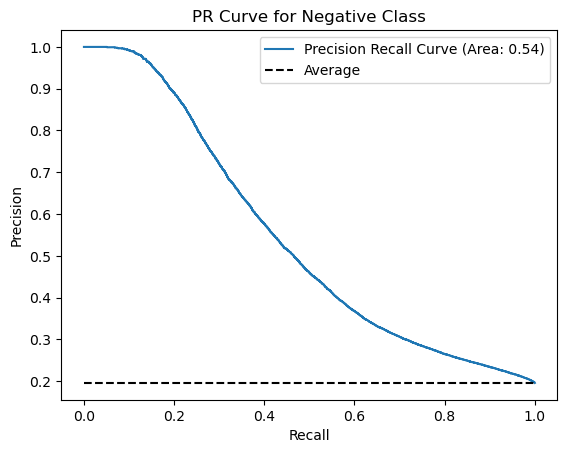

In [140]:
ypred_prob_neg = lor.predict_proba(xtest_scaled)[:,0]
p, r, th = plot_prc(ytest, ypred_prob_neg, 0)
plt.title("PR Curve for Negative Class")
plt.show()

### Results Analysis

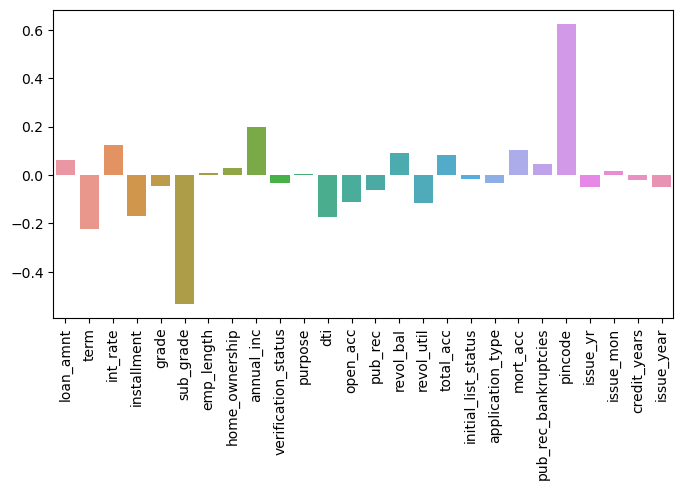

In [141]:
plt.figure(figsize=(8,4))
sns.barplot(y=list(lor.coef_[0]), x=list(xtrain.columns))
plt.xticks(rotation=90)
plt.show()

#### Inference:
- The regression coefficients indicate that subgrade and pincode provides major contribution to the model.
- Conversely, pub_rec and pub_rec_bankruptcies show negligible contribution, suggesting minimal impact on the target variable.
- Features such as term, installment, annual_inc, dti, and mort_acc also demonstrate significant contributions to the model.

## Address Class Imbalance 
- SMOTE
- Class Weightage

### SMOTE

In [92]:
from imblearn.over_sampling import SMOTE

In [142]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [143]:
lor_smote = LogisticRegression()
lor_smote.fit(X_resampled_scaled, y_resampled)
ypred = lor_smote.predict(xtest_scaled)
ypred_prob = lor_smote.predict_proba(xtest_scaled)[:,1]

In [144]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.28      0.70      0.40     23260
           1       0.88      0.55      0.68     95549

    accuracy                           0.58    118809
   macro avg       0.58      0.63      0.54    118809
weighted avg       0.76      0.58      0.62    118809



<Figure size 100x100 with 0 Axes>

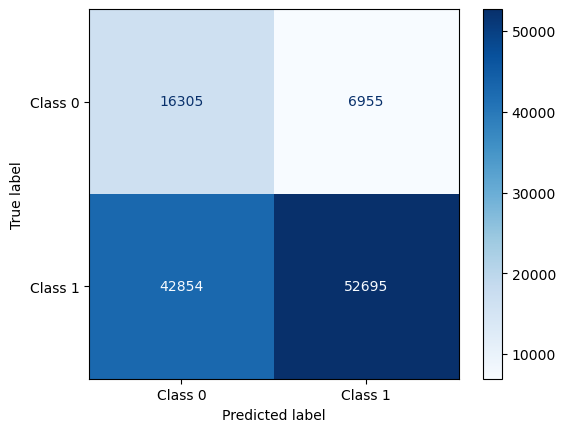

In [145]:
plot_conf_matrix(ytest, ypred)

In [146]:
performance_metrics(ytest, ypred)

True Positive Rate:  0.55
True Negative Rate:  0.7
False Positive Rate:  0.3
False Negative Rate:  0.45
Accuracy:  0.58
Precision:  0.55
Recall:  0.88
F1 Score:  0.68


#### Inference:
- SMOTE technique reduces the False positive rate significantly to 0.3
- False negative rate is increased significantly as it reduces the false positive rate

#### ROC Analysis

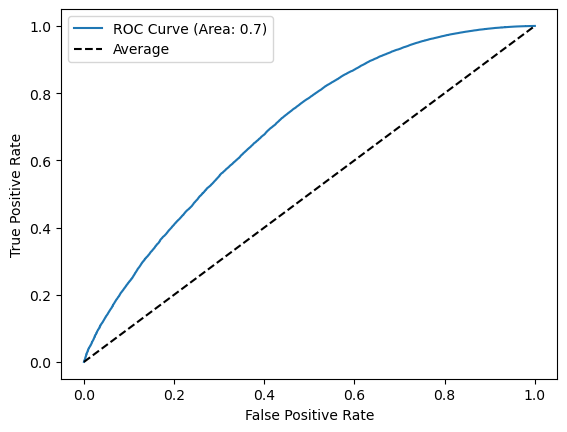

In [147]:
plot_roc(ytest, ypred_prob)
plt.show()

#### Inference:
- AUC is slightly increased but not significantly indicating that the model has the similar performance as that of previous model. 
- Other target class balancing methods to be applied

#### Precision Recall Curve Analysis

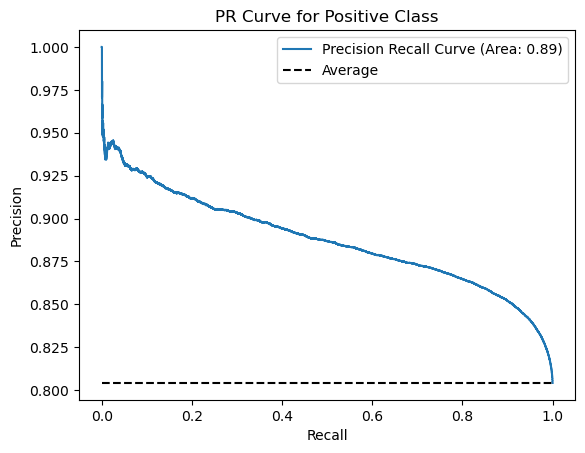

In [148]:
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

In [149]:
# Optimal Threshold Selection
optim_th = OptimumThreshold(p, r, th)
ypred_optim = np.zeros(shape=ypred.shape)
ypred_optim[ypred_prob > optim_th] = 1
print(bold_start + "Optimal Threshold :" + bold_end, round(optim_th,2))
print(classification_report(ytest, ypred_optim))

Optimal Threshold : 0.25
              precision    recall  f1-score   support

           0       0.42      0.42      0.42     23260
           1       0.86      0.86      0.86     95549

    accuracy                           0.77    118809
   macro avg       0.64      0.64      0.64    118809
weighted avg       0.77      0.77      0.77    118809



<Figure size 100x100 with 0 Axes>

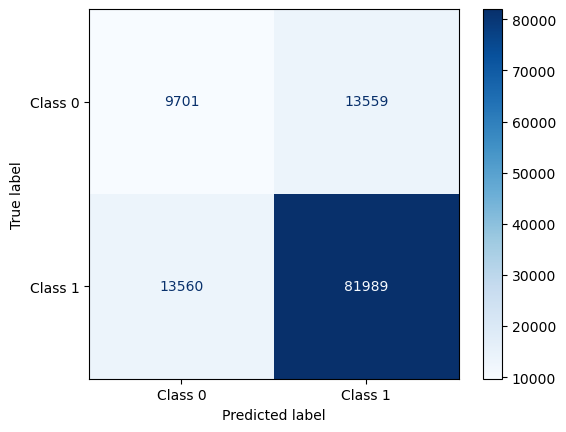

In [150]:
plot_conf_matrix(ytest,ypred_optim)

In [151]:
performance_metrics(ytest,ypred_optim)

True Positive Rate:  0.86
True Negative Rate:  0.42
False Positive Rate:  0.58
False Negative Rate:  0.14
Accuracy:  0.77
Precision:  0.86
Recall:  0.86
F1 Score:  0.86


#### Inference:
- Based on the PR curve of positive class, an optimal threshold is chosen (by trade off between precision and recall)
- Optimal threshold increases the false positive rate

### Class Weightage

In [152]:
logr_cw = LogisticRegression(class_weight='balanced', max_iter=1000)

In [153]:
logr_cw.fit(xtrain_scaled, ytrain)
ypred = logr_cw.predict(xtest_scaled)
ypred_prob = logr_cw.predict_proba(xtest_scaled)[:,1]

### Performance Analysis

In [154]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.35      0.66      0.46     23260
           1       0.89      0.71      0.79     95549

    accuracy                           0.70    118809
   macro avg       0.62      0.68      0.62    118809
weighted avg       0.79      0.70      0.72    118809



<Figure size 100x100 with 0 Axes>

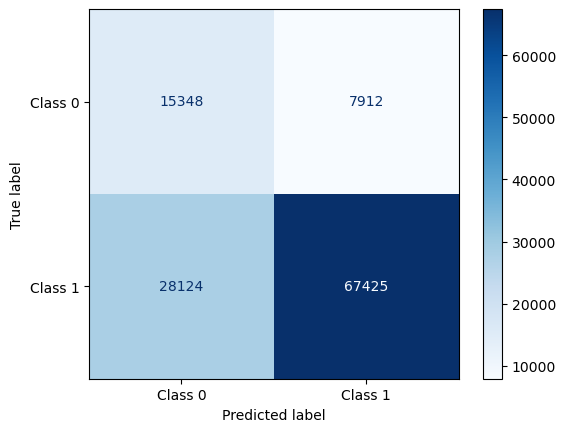

In [155]:
plot_conf_matrix(ytest, ypred)

In [156]:
performance_metrics(ytest, ypred)

True Positive Rate:  0.71
True Negative Rate:  0.66
False Positive Rate:  0.34
False Negative Rate:  0.29
Accuracy:  0.7
Precision:  0.71
Recall:  0.89
F1 Score:  0.79


#### Inference:
- Prediction of positive class is satisfactory as it achieves better precision and recall scores. In this case, high precision will not be the reason for the positive class being the majority class.
- False positive rate is significantly reduced compared to simple logistic regression model, further it needs to be adjusted
- False negative rate is increased significantly as it reduces the false positive rate

#### ROC Analysis

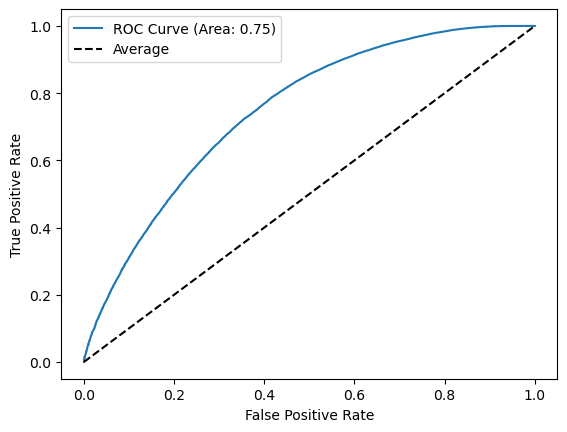

In [157]:
plot_roc(ytest, ypred_prob)
plt.show()

#### Inference:
- AUC is slightly increased but not significantly indicating that the model has the similar performance as that of previous model. 
- Other target class balancing methods to be applied

#### Precision Recall Curve Analysis

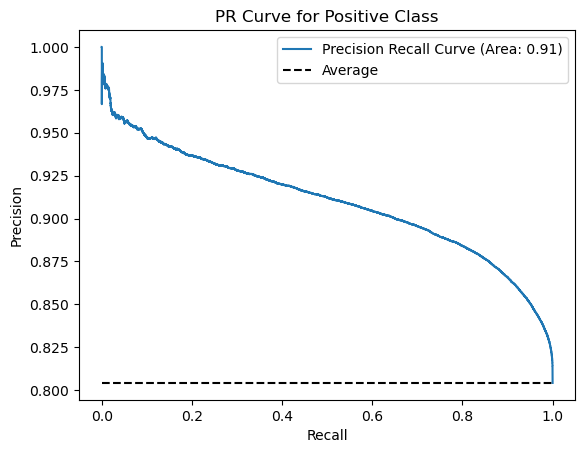

In [158]:
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

In [159]:
# Optimal Threshold Selection
optim_th = OptimumThreshold(p, r, th)
ypred_optim = np.zeros(shape=ypred.shape)
ypred_optim[ypred_prob > optim_th] = 1
print(bold_start + "Optimal Threshold :" + bold_end, round(optim_th,2))
print(classification_report(ytest, ypred_optim))

Optimal Threshold : 0.36
              precision    recall  f1-score   support

           0       0.47      0.47      0.47     23260
           1       0.87      0.87      0.87     95549

    accuracy                           0.79    118809
   macro avg       0.67      0.67      0.67    118809
weighted avg       0.79      0.79      0.79    118809



<Figure size 100x100 with 0 Axes>

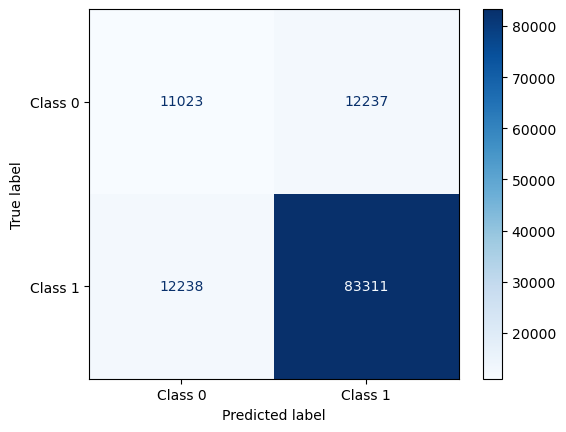

In [160]:
plot_conf_matrix(ytest,ypred_optim)

In [161]:
performance_metrics(ytest,ypred_optim)

True Positive Rate:  0.87
True Negative Rate:  0.47
False Positive Rate:  0.53
False Negative Rate:  0.13
Accuracy:  0.79
Precision:  0.87
Recall:  0.87
F1 Score:  0.87


#### Inference:
- Based on the PR curve of positive class, an optimal threshold is chosen (by trade off between precision and recall)
- Optimal threshold increases the false positive which is undesirable, hence threshold of 0.5 is acceptable

## Regularization of Logistic Regression Model

In [162]:
lamb = [0.0001, 0.001, 0.01, 0.1, 1]
for i in lamb:
    lor_reg = LogisticRegression(C = i, penalty='l2')
    lor_reg.fit(xtrain_scaled, ytrain)
    ypred = lor_reg.predict(xtest_scaled)
    print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.21      0.34     23260
           1       0.84      0.99      0.91     95549

    accuracy                           0.84    118809
   macro avg       0.83      0.60      0.62    118809
weighted avg       0.83      0.84      0.80    118809

              precision    recall  f1-score   support

           0       0.78      0.26      0.39     23260
           1       0.85      0.98      0.91     95549

    accuracy                           0.84    118809
   macro avg       0.81      0.62      0.65    118809
weighted avg       0.83      0.84      0.81    118809

              precision    recall  f1-score   support

           0       0.77      0.27      0.40     23260
           1       0.85      0.98      0.91     95549

    accuracy                           0.84    118809
   macro avg       0.81      0.63      0.65    118809
weighted avg       0.83      0.84      0.81    118809

              preci

In [163]:
lamb = [0.0001, 0.001, 0.01, 0.1, 1 , 5, 10]
for i in lamb:
    lor_reg = LogisticRegression(C = i, penalty='l1', solver='liblinear')
    lor_reg.fit(xtrain_scaled, ytrain)
    ypred = lor_reg.predict(xtest_scaled)
    print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25     23260
           1       0.83      1.00      0.91     95549

    accuracy                           0.83    118809
   macro avg       0.91      0.57      0.58    118809
weighted avg       0.86      0.83      0.78    118809

              precision    recall  f1-score   support

           0       0.80      0.26      0.39     23260
           1       0.85      0.98      0.91     95549

    accuracy                           0.84    118809
   macro avg       0.82      0.62      0.65    118809
weighted avg       0.84      0.84      0.81    118809

              precision    recall  f1-score   support

           0       0.77      0.27      0.40     23260
           1       0.85      0.98      0.91     95549

    accuracy                           0.84    118809
   macro avg       0.81      0.63      0.65    118809
weighted avg       0.83      0.84      0.81    118809

              preci

#### Inference;
- Both L1 and L2 regularization with different regularization strength doesn't improve the performance

# Questionairre

#### 1. What percentage of customers have fully paid their Loan Amount?
- `80.39% customers fully paid the loan`

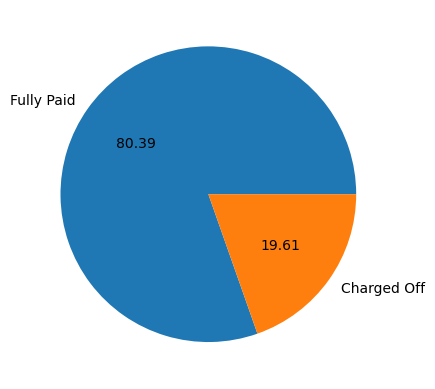

In [164]:
plt.pie(df['loan_status'].value_counts(), labels=['Fully Paid', 'Charged Off'], autopct="%0.2f")
plt.show()

#### 2. Comment about the correlation between Loan Amount and Installment features
- `Heteroskedacity between the features is observed. Increase in installment increases the variance of loan amount`
- `Correlation strength of 0.95 indicates that the features are highly linearly correlated`

In [165]:
print("Correlation strength between loan amount and installment is", round(df['loan_amnt'].corr(df['installment']),2))

Correlation strength between loan amount and installment is 0.96


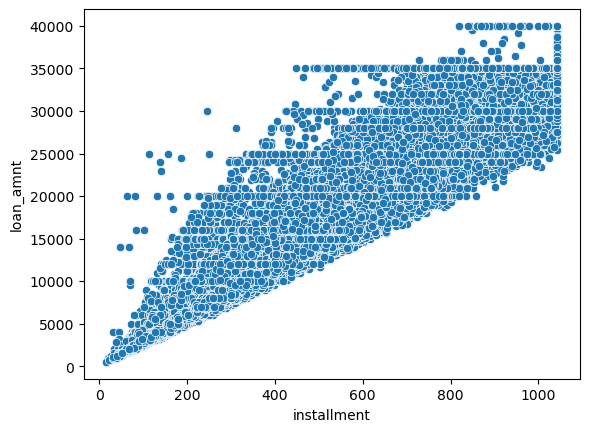

In [166]:
sns.scatterplot(x=df['installment'], y=df['loan_amnt'])
plt.show()

#### 3. The majority of people have home ownership as _______.
- `~50% of people are having home in Mortgage`

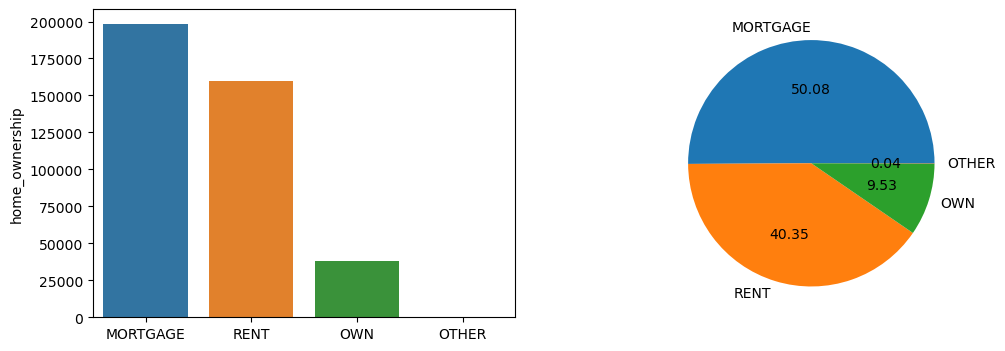

In [167]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(y=raw_df['home_ownership'].value_counts(), x=list(raw_df['home_ownership'].value_counts().index))
plt.subplot(1,2,2)
plt.pie(df['home_ownership'].value_counts(), labels=list(raw_df['home_ownership'].value_counts().index), autopct="%0.2f")
plt.show()

#### 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
- `True, The ratio of fullypaid to all for grade 'A' is high indicating that the grades 'A' are highly likely to pay their loan compared to other grades`

In [168]:
ct = pd.crosstab(raw_df['grade'], raw_df['loan_status'], margins=False, normalize='index')

<Axes: ylabel='Fully Paid'>

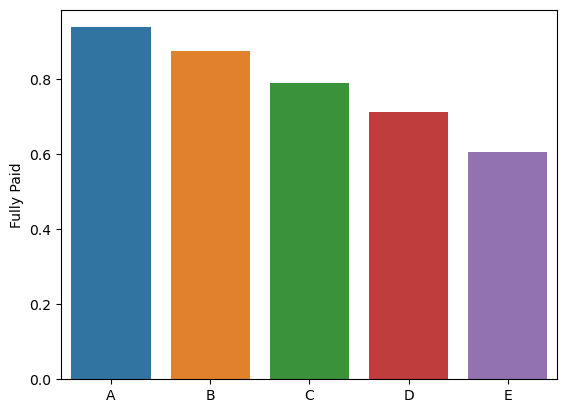

In [169]:
sns.barplot(x  = list(ct.index), y = ct['Fully Paid'])

#### 5. Name the top 2 afforded job titles.
- `Teacher and Manager are top 2 afforded/loyal job titles who doesn't default loan` 

In [170]:
raw_df.groupby('loan_status')['emp_title'].value_counts()['Fully Paid'].head(2)

emp_title
Teacher    3532
Manager    3321
Name: emp_title, dtype: int64

####  6. Thinking from a bank's perspective, which metric should our primary focus be on.
- `Consider Charged off as Positive class and Fully paid as negative class`
- `For a bank evaluating loan applications, both false positives and false negatives are crucial since they directly affect revenue. Here's how they impact:`
- **High False Positive Rate (FPR):**
    - `Misclassification of defaulters: The bank incorrectly approves loans for defaulters.`
    - `This can result in significant revenue loss, as the bank risks losing the loan's principal amount, which may outweigh potential gains from interest.`
- **High False Negative Rate (FNR):**
    - `Misclassification of loyal customers: The bank misses out on good business opportunities by rejecting creditworthy applicants.`
    - `While this leads to revenue loss in terms of forgone interest, the loss is generally less critical compared to the risk associated with false positives`
- **Conclusion:**
    - `Considering the significant revenue impact of false positives, Precision should be prioritized over Recall. Alternatively, an F1 score with higher weightage on precision can be used to account for both factors while focusing on minimizing false positives.`

#### 7. How does the gap in precision and recall affect the bank?
- `A gap between precision and recall arises when false positives (FP) or false negatives (FN), or both, deviate from zero.`
- **Impact of False Positives (FP):**
    - `An increase in false positives leads to a higher risk of lending loans to defaulters.`
    - `This directly impacts the bank's revenue by causing potential capital loss.`
- **Impact of False Negatives (FN):**
    - `An increase in false negatives results in missed opportunities to provide loans to loyal customers.`
    - `While this leads to a loss in potential interest income, the financial impact is generally smaller compared to false positives.`
- **Priority:**
    - `The bank prioritizes minimizing false positives over false negatives, as the financial loss associated with lending to defaulters is significantly higher than the opportunity cost of missing out on loyal customers.`

#### 8. Which were the features that heavily affected the outcome?
- `From the model coefficients, it is observed that the pincode extracted from address, annual increment and int rate positively influences and sub grade, term and dti negatively influences the model outcome`

In [171]:
reg_coef = dict(zip(xtrain.columns, lor.coef_[0]))
sorted(reg_coef.items(), key=lambda x: x[1])

[('sub_grade', -0.532220330209887),
 ('term', -0.2229088616638301),
 ('dti', -0.17318290564657168),
 ('installment', -0.16940706600620506),
 ('revol_util', -0.11447757006924449),
 ('open_acc', -0.11182679188669337),
 ('pub_rec', -0.060641830520518365),
 ('issue_year', -0.0495831797337394),
 ('issue_yr', -0.04958317973347442),
 ('grade', -0.045789525834058264),
 ('verification_status', -0.03366417874819802),
 ('application_type', -0.030752097963961566),
 ('credit_years', -0.021182507816281733),
 ('initial_list_status', -0.01760674996034994),
 ('purpose', 0.005836471436532183),
 ('emp_length', 0.008400989246806202),
 ('issue_mon', 0.01875296807755933),
 ('home_ownership', 0.028028927739491748),
 ('pub_rec_bankruptcies', 0.04623887486481244),
 ('loan_amnt', 0.06044040860089254),
 ('total_acc', 0.0836641714246386),
 ('revol_bal', 0.08926636615804928),
 ('mort_acc', 0.10469200769238945),
 ('int_rate', 0.12266007543771137),
 ('annual_inc', 0.1975197912406461),
 ('pincode', 0.6256375041245565

#### 9. Will the results be affected by geographical location? (Yes/No)
- `From the model coefficients, it is observed that the pincode extracted from address highly influences the model outcome`

# Business Insights

- **36 months is the preferred tenure** in the loan
- Grade **B** is given for the **majority** of the customers
- Subgrade **B3** (Might be the subgrade of grade B) is given for the **majority** of the customers
- Majority of the Professional Teachers are looking for the loan
- 10+ years experienced professional are looking for the loan
- **Mortgaged home owners are majorly looking for the loan****, as their income is already locked for EMI
- Majority of the income status of the customers are verified
- Loan status is Fully paid (Trustable Customer), Charged Off (Defaulter)
- **Majority of the borrowers are expecting loan to close another debt** indicating the borrowers already have a debt
- issue_d, earliest_cr_line are Date Features
- Majority of the borrowers are individual
- **Average loan amount** in the dataset is **~14000** and 500 being the lowest loan amount 
- The **interest rate** ranges from ~5% to ~31% and the **average being ~13%**
- **Average installment amount is ~400** and ~16 being the lowest loan amount 
- Average annual increment mentioned by borrowers are in the range of 0 to 8.7million 
- **Average Open credit lines of the borrowers is ~11**
- The Difference between Q3 and max indicates the highly right skewed data
- **Average revolving balance is ~15000** while applying for the loan
- **Average number of credit lines is ~25** while applying for the loan
- **mort_acc:**
	- **Average number of mortgage accounts is ~2** while applying for the loan
	- The Difference between Q3 and max indicates the highly right skewed data
- For pub_rec_bankruptcies, the Difference between Q3 and max indicates the highly right skewed data
- Null Values in the dataset are identified for features mort_acc, emp_title, emp_length, title, pub_rec_bankruptcies and revol_util
- open_acc, pub_rec, mort_acc, pub_rec_bankruptcies are defined as numerical but should be changed to categorical
- Extracted the pincode from the complete textual address, gives following actionable insights
	- **Notably, loans were applied from only 10 unique pincodes, suggesting that borrowers are concentrated in a small number of cities**. 
	- Also this indicates that the "Loantap" business is not yet widely recognized.
- The **majority of loans were issued between 2013 and 2015**, with October and July emerging as the top two months for loan approvals
- The distribution of the earliest credit line is left-skewed and centered around the year 2000, indicating that most borrowers began their credit journey during this period
- Following features are highly correlated
    - loan amount and installment
    - open acc and total acc
    - pub rec and pub rec bankruptcies
- **Outliers in the data make it challenging to draw meaningful inferences**
- A clear distinction is observed in the distribution of interest rate and DTI (debt-to-income ratio) between loyal customers and defaulters.
- Other features show no significant difference in their distribution relative to the target variable, though this needs to be validated through statistical tests.
- The ratio of fully paid loan to default loan is high on the year 2013
- **People with grades ‘A’ are more likely to fully pay their loan**
- Loans with a 60-month term are significantly more likely to result in default.
- Professionals with **10+ years of experience show a higher likelihood of defaulting on their loans**
- Verified accounts have a reduced likelihood of being charged off.
- **Customers with 0 mortgage accounts are less prone to default**
- The geographical location (pincode) extracted from the address plays a crucial role in influencing loan defaults.
- **Mortgaged homeowners show a significant tendency to default on their loans**
- Customers with an A-grade credit rating are substantially less likely to default.
- Other features do not show a significant impact on loan repayment behavior.
- Churn Ratio: No. of Charged off/No. of Fully paid
    - **2015 and 2016 years dominate in churn ratio**, hence issue_yr is a contributing factor
    - Churn ratio over months shows similar trend, hence issue_mon doesn't provide significant contribution for churning
- Principal Component Analysis:
	- The first principal component, which explains approximately 65% of the variance in the data, is constructed with nearly equal contributions from all features in the dataset
	- Out of 24 features from the dataset, **First 5 principal components captures >60% of variance in data**
	- Dimensionality reduction is possible by reducing 4-5 features as it captures <5% of variance in data
- Statistical Tests:
	- **The means between the categories for most of the features are significantly different**, suggesting that these features could effectively classify loan status
	- Whereas no significant difference between the means of the categories of revol_bal, indicating that this feature may have limited utility in distinguishing between loan statuses during modeling
	- The contingency test confirms that **loan status is dependent on most of the categorical features**, suggesting their effectiveness in classifying loan status.
	- However, the features **pub_rec and pub_rec_bankruptcies show no dependency on loan status**, indicating that these features may have limited influence on classification
	- Logistic regression coefficients also confirms the above point
- Modeling:
	- Prediction of positive class is satisfactory as it achieves high precision and recall. High precision may also be the reason that the positive class is the majority class.
	- **False Positive Rate: Indicates the misclassification of defaulters. It results in incorrectly approving the loans for defaulters**.
	- FPR can result in significant revenue loss, as the bank risks losing the loan's principal amount, which may outweigh potential gains from interest.
    - **False Negative Rate: Indicates the misclassification of loyal customers. The bank misses out on good business opportunities by rejecting creditworthy applicants**
	- Based on the PR curve of positive class, an optimal threshold of 0.7 is chosen (by trading off between precision and recall)
	- **Optimal threshold significantly reduces the false positive rate by 20% and improves the f1 score of negative class by 10%**
	- The regression coefficients indicate that subgrade and pincode provides major contribution to the model.
	- Conversely, pub_rec and pub_rec_bankruptcies show negligible contribution, suggesting minimal impact on the target variable.
	- Features such as **term, installment, annual_inc, dti, and mort_acc also demonstrate significant contributions** to the model
	- Class weightage technique to address the class imbalancement in the dataset doesn't significantly improve the performance

# Data Transformation Recommendations

- Missing values and Outlier Treatment:
	- As the features **emp_length, mort_acc, pub_rec_bankruptcies are categorical, the missing values are replaced with mode**
	- As the mean and median of revol_util are almost equal, median is used to replace the missing the values
	- **Outliers of int rate is handled using log transformation**
	- For other features, as the log transformation the outlier is far from the q3, hence upper bound is limited with iqr*1.5\
- Data Transformation:
	- **earliest_cr_line is transformed to credit years** and only year is extracted from issue date as new features
	- **Target encoding for Nominal features** (replaced with its frequency)
	- **Label encoding for Ordinal features is performed
- Modeling:
	- **Simple logistic regression model achieves the accuracy of 85% with F1 score being 0.91**
	- Based on the analysis of ROC and PR curve, a trade off between the precision and recall is achieved to reduce the false positive rate
	- Regularization doesn't significantly impact the performance of the model and hence can be ignored

# Business Recommendations

- Loans were primarily applied from only 10 unique pincodes, highlighting that borrowers are concentrated in a limited number of cities. This suggests that the "Loantap" business is not yet widely recognized. **It is recommended that the firm expand its reach or enhance marketing efforts in other regions to boost revenue.**

- The model exhibits a significant number of false positives, indicating a need for **additional verification steps before finalizing decisions based on model predictions**.

- To improve the model's performance, **additional features should be incorporated** in future iterations.

- Around 15% of the data points contain at least one missing value. This indicates the need for a more **robust data collection process** to enhance model reliability and performance.

# Prepared By Muthukumar G